# Context

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

### Objective

- Explore and visualize the dataset.

- Build a linear regression model to predict the prices of used cars.

- Generate a set of insights and recommendations that will help the business.

### Attribute Information

- S.No. : Serial Number
- Name : Name of the car which includes Brand name and Model name
- Location : The location in which the car is being sold or is available for purchase Cities
- Year : Manufacturing year of the car
- Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
- Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
- Transmission : The type of transmission used by the car. (Automatic / Manual)
- Owner : Type of ownership
- Mileage : The standard mileage offered by the car company in kmpl or km/kg
- Engine : The displacement volume of the engine in CC.
- Power : The maximum power of the engine in bhp.
- Seats : The number of seats in the car.
- New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
- Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)
 

## Key Steps

**1. <a href = #link1>Overview of the data</a>**

**2. <a href = #link2>Processing Data</a>**

**3. <a href = #link3>Exploratory Data Analysis</a>**

**4. <a href = #link4>Data Preparation for Modeling</a>**

**5. <a href = #link5>Test Assumptions of linear regresion model</a>**

**6. <a href = #link6>Model Performance Evaluation</a>**

**7. <a href = #link7>Conclusion</a>**


In [185]:
#Import necessary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings

warnings.filterwarnings("ignore")

#to enable plotting graphs in Jupiter notebook
%matplotlib inline 

# Removes the limit from the number of displayed columns and rows.
# To see the entire dataframe when it print 
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 200)

# To build linear regression model
from sklearn.linear_model import LinearRegression,Ridge,Lasso

#To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import MinMaxScaler, StandardScaler


# <a id = 'link1'>Overview of the data</a>

In [186]:
#Load the data into pandas dataframe

data= pd.read_csv("used_cars_data.csv", index_col=0)



In [187]:

df=data.copy()

print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')  # f-string
# Looking at 10 random rows
# Setting the random seed via np.random.seed so that
# Getting the same random results every time
np.random.seed(1)
df.sample(n=10)

There are 7253 rows and 13 columns.


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.000,9.47 Lakh,6.000
3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.000,5.44 Lakh,4.110
4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.000,NaN,6.000
3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.000,NaN,35.280
4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.000,NaN,6.340
599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.000,28.05 Lakh,24.820
186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.000,NaN,32.000
305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.000,NaN,20.770
4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.000,NaN,2.500


#### Preliminary Insights from the data

- Each column has different scale of data.
- Kilometers_driven seems to be from 13913 to 130000
- Seems like prices depend of Name

#### Observations 

- Columns such as Location, Fuel_Type, Transmission, Owner_Type need to be converted this text to mumerical values.
- Columns such as Milage, Engine, Power and New_Price need to be converted to unitless.


In [188]:
#take a look at the column names
df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.3+ KB


- There are 7253 rows and 13 columns

- Mileage, Engine, Power, New_Price and Price has missing values
 
- Mileage, Engine, Power, New_Price need to be unitless and be float category.
 
- Name, Location, Fuel_Type, Transmission and Owner_Type needs to be change to categorical

- The dependent variable is Price

# <a id = 'link2'>Processing Data</a>

In [190]:
# looking at which columns have the most missing values
df.isnull().sum().sort_values(ascending=False)

New_Price            6247
Price                1234
Seats                  53
Engine                 46
Power                  46
Mileage                 2
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
dtype: int64

New Price and Price has the most missing values in the DataFrame

## Processing Columns

Turn columns into numeric columns

The following function will which columns ends with the denomination Lakh

In [191]:
# this loop prints the names of the columns where there is
# at least one entry ending the world 'Lakh'
money_cols = []
for colname in df.columns[df.dtypes == 'object']:  # only need to consider string columns
    if df[colname].str.endswith('Lakh').any():  # using `.str` so I can use an element-wise string method
        money_cols.append(colname)
print(money_cols)

['New_Price']


New Prices are in Cr and Lakh, I need to convert them in a unit coin

In [192]:
def income_to_num(income_val):
    """This function takes in a string representing a salary in Lakh and CR
    and converts it to a number. For example, '1 Cr' becomes 100 Lakh.
    If the input is already numeric, which probably means it's NaN,
    this function just returns np.nan."""
    if isinstance(income_val, str):  # checks if `income_val` is a string
        multiplier = 1  # handles both
        if income_val.endswith('Lakh'):
            multiplier = 1
        elif income_val.endswith('Cr'):
            multiplier = 100
        return float(income_val.replace('Lakh', '').replace('Cr', '')) * multiplier
    else:  # this happens when the current income is np.nan
        return np.nan

for colname in money_cols:
    df[colname] = df[colname].apply(income_to_num)
    
df[money_cols].head()  # good to go!

,New_Price
S.No.,
0,NaN
1,NaN
2,8.610
3,NaN
4,NaN


Now, let's convert Mileage (kmpl or km/kg), Engine (CC) and Powr (bhp) into a numerical column by removing their units.

In [193]:
df['Mileage']=df['Mileage'].str.extract('(\d*\.?\d*)', expand=False).astype(float)


In [194]:
df['Engine']=df['Engine'].str.extract('(\d*\.?\d*)', expand=False).astype(float)

In [195]:
power_temp=df["Power"].str.split(" ",n=1,expand=True)
power_temp.sample(n=10)

,0,1
S.No.,,
2245,81.80,bhp
6407,81.80,bhp
1226,138.03,bhp
533,118,bhp
6330,81.83,bhp
5931,93.7,bhp
2784,63.1,bhp
5180,157.75,bhp
2722,108.62,bhp


In [196]:
df['Power']=power_temp[0]
df['Power_Type']=power_temp[1]
df.drop(['Power_Type'],axis=1,inplace=True)
del power_temp

In [197]:
df['Power']=df['Power'].str.replace('null','0').astype(float)


Now, convert Location, Fuel_Type, Transmission and Owner Type into a category type.

In [198]:
# categorical column should be converted to categorical type 

df['Location']=df.Location.astype('category')
df['Fuel_Type']=df.Fuel_Type.astype('category')
df['Transmission']=df.Transmission.astype('category')
df['Owner_Type']=df.Owner_Type.astype('category')

Split Name into Brand and Class

In [199]:
#Split Name into Brand and Model to be more spechific

Name_temp=df["Name"].str.split(" ",n=1,expand=True)
Name_temp.sample(n=10)

,0,1
S.No.,,
3123,Tata,Manza Aqua Safire
6647,Audi,A6 2011-2015 2.0 TDI Premium Plus
5579,Maruti,SX4 Vxi BSIII
1083,Toyota,Corolla Altis D-4D J
2961,Honda,Amaze S AT i-Vtech
7155,Mercedes-Benz,New C-Class C 220d Avantgarde Edition C
152,Mercedes-Benz,S Class 2005 2013 S 500
1305,BMW,X1 M Sport sDrive 20d
875,Toyota,Innova Crysta 2.8 ZX AT


In [200]:
df['Brand']=Name_temp[0]
df['Class']=Name_temp[1]

del Name_temp


In [201]:

# shift column 'Brand' to first position and Class to second
first_column = df.pop('Brand')
second_column = df.pop('Class')
  
# insert column using insert(position,column_name,
# first_column) function
df.insert(0, 'Brand', first_column)
df.insert(1, 'Class', second_column)


np.random.seed(1)
df.sample(n=10)


,Brand,Class,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,,,
2397,Ford,EcoSport 1.5 Petrol Trend,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.000,1497.000,121.360,5.000,9.470,6.000
3777,Maruti,Wagon R VXI 1.2,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.500,1197.000,81.800,5.000,5.440,4.110
4425,Ford,Endeavour 4x2 XLT,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.100,2499.000,141.000,7.000,NaN,6.000
3661,Mercedes-Benz,E-Class E250 CDI Avantgrade,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.000,2143.000,201.100,5.000,NaN,35.280
4514,Hyundai,Xcent 1.2 Kappa AT SX Option,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.900,1197.000,82.000,5.000,NaN,6.340
599,Toyota,Innova Crysta 2.8 ZX AT,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.360,2755.000,171.500,7.000,28.050,24.820
186,Mercedes-Benz,E-Class E250 CDI Avantgrade,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.000,2143.000,201.100,5.000,NaN,32.000
305,Audi,A6 2011-2015 2.0 TDI Premium Plus,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.680,1968.000,174.330,5.000,NaN,20.770
4582,Hyundai,i20 1.2 Magna,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.500,1197.000,80.000,5.000,NaN,2.500


In [202]:
df['Brand']=df.Brand.astype('category')
df['Class']=df.Class.astype('category')

In [203]:
# Check the data
df["Brand"].value_counts()

Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land               67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini               31
Volvo              28
Jeep               19
Porsche            19
Datsun             17
ISUZU               3
Force               3
Isuzu               2
Bentley             2
Ambassador          1
Smart               1
OpelCorsa           1
Hindustan           1
Lamborghini         1
Name: Brand, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Brand'>

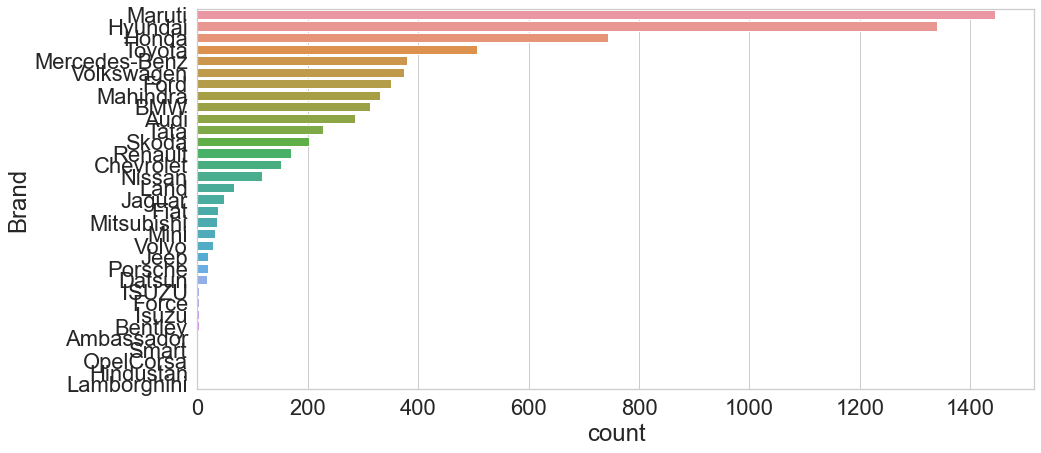

In [204]:
plt.figure(figsize=(15, 7))
sns.countplot(y="Brand", data=df, order=df["Brand"].value_counts().index)

### Let's extract Car Model

In [205]:
# Extract Model Names
df["Model"] = df["Class"].apply(lambda x: x.split(" ")[0].lower())

# Check the data
df["Model"].value_counts()

swift      418
city       318
i20        303
innova     203
verna      200
          ... 
fortwo       1
redi         1
e            1
mustang      1
1.4gsi       1
Name: Model, Length: 218, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Model'>

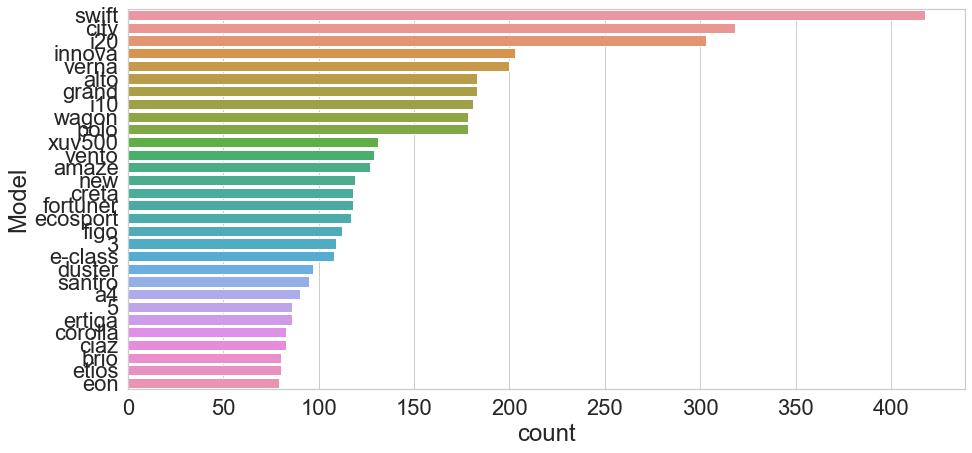

In [206]:
plt.figure(figsize=(15, 7))
sns.countplot(y="Model", data=df, order=df["Model"].value_counts().index[0:30])

It is clear from the above charts that out dataset contains used cars from luxury as well as budget friendly brands.

We can create a new variable using this information. We will bin all our cars in 3 categories -

1. Budget Friendly
2. Mid Range
3. Luxury Cars

In [207]:
Third_column = df.pop('Model')
# insert column using insert(position,column_name,
# first_column) function
df.insert(2, 'Model', Third_column)

#### Let's create a Category for cars

In [208]:
df.groupby(["Brand"])["Price"].mean().sort_values(ascending=False)

Brand
Lamborghini     120.000
Bentley          59.000
Porsche          48.348
Land             39.260
Jaguar           37.632
Mini             26.897
Mercedes-Benz    26.810
Audi             25.538
BMW              25.243
Isuzu            20.000
Volvo            18.803
Jeep             18.719
ISUZU            12.045
Toyota           11.580
Mitsubishi       11.059
Force             9.333
Mahindra          8.046
Skoda             7.559
Ford              6.889
Renault           5.799
Honda             5.412
Hyundai           5.343
Volkswagen        5.307
Nissan            4.738
Maruti            4.517
Tata              3.563
Fiat              3.269
Datsun            3.049
Chevrolet         3.044
Smart             3.000
Ambassador        1.350
Hindustan           NaN
OpelCorsa           NaN
Name: Price, dtype: float64

- The most expensive one is the Lamborghine (probably an outlier).
- Towards the bottom is showed more bugdet friendly ones
- Two brand show missingness.

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Brand              7253 non-null   category
 1   Class              7253 non-null   category
 2   Model              7253 non-null   object  
 3   Name               7253 non-null   object  
 4   Location           7253 non-null   category
 5   Year               7253 non-null   int64   
 6   Kilometers_Driven  7253 non-null   int64   
 7   Fuel_Type          7253 non-null   category
 8   Transmission       7253 non-null   category
 9   Owner_Type         7253 non-null   category
 10  Mileage            7251 non-null   float64 
 11  Engine             7207 non-null   float64 
 12  Power              7207 non-null   float64 
 13  Seats              7200 non-null   float64 
 14  New_Price          1006 non-null   float64 
 15  Price              6019 non-null   float64 
dtypes: cat

### Basic Summary Statistics and Consequences

This is EDA not data preprocessing but we need to know what's going on in order to know how to prepare the data for whatever comes next.

##### Numerical features

In [210]:
df.describe().T  # quick summary of numeric features

,count,mean,std,min,25%,50%,75%,max
Year,7253.000,2013.365,3.254,1996.000,2011.000,2014.000,2016.000,2019.000
Kilometers_Driven,7253.000,58699.063,84427.721,171.000,34000.000,53416.000,73000.000,6500000.000
Mileage,7251.000,18.142,4.562,0.000,15.170,18.160,21.100,33.540
Engine,7207.000,1616.573,595.285,72.000,1198.000,1493.000,1968.000,5998.000
Power,7207.000,110.747,55.081,0.000,74.000,91.720,138.030,616.000
Seats,7200.000,5.280,0.812,0.000,5.000,5.000,5.000,10.000
New_Price,1006.000,22.780,27.759,3.910,7.885,11.570,26.043,375.000
Price,6019.000,9.479,11.188,0.440,3.500,5.640,9.950,160.000


#### Strategy for the model

- Mileage: I would go with median or mean to fill out, also the value 0 seems to be mistake
- New Price and price: even though the data only have 14% of the data for New Price and wont provide a clear overview of the marketplace in general, it is veru clear that the mean for New Cars Price(New_Price) is 2.40 more than the used car Price
- Seats: 0 seats seems to be a mistake
- Power: 0 power seems to be a mistake
- Kilometer driven: has a big range
- Data Insights: Reduce the scale on Kilometers_Driven and Power


###### Non numerical features

In [211]:
# looking at value counts for non-numeric features

num_to_display = 10  # defining this up here so it's easy to change later if I want
for colname in df.dtypes[df.dtypes == 'category'].index:
    val_counts = df[colname].value_counts(dropna=False)  # i want to see NA counts
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f'Only displaying first {num_to_display} of {len(val_counts)} values.')
    print('\n\n') # just for more space between 

Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Name: Brand, dtype: int64
Only displaying first 10 of 33 values.



XUV500 W8 2WD          55
Swift VDI              49
Swift Dzire VDI        42
City 1.5 S MT          39
Swift VDI BSIV         37
Fortuner 3.0 Diesel    35
Ritz VDi               35
Brio S MT              32
City 1.5 V MT          32
Amaze S i-Dtech        32
Name: Class, dtype: int64
Only displaying first 10 of 2041 values.



Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Name: Location, dtype: int64
Only displaying first 10 of 11 values.



Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64



Manual       

In the Indian market this is the most important features in the car business:
    
- The Top 5 most popular cars from 33 different brands are: Maruti, Hyundai, Honda, Toyota and Mercedes-Benz
- The city with most data obtained is Mumbai.
- Consumers prefer Diesel and Petrol over the othe fuel alternatives.
- Also, prefer Manual transmission cars.
- And, most of the vehicles out there, are First pre-owned cars.
    

## Missing Values

In [212]:
# Checking missing values per row
num_missing = df.isnull().sum(axis=1)
num_missing.value_counts()

1    5335
2    1048
0     823
4      36
5      10
3       1
dtype: int64

The data has a large quantity of row with at least one missing values, this has to be reduced.

The New_Price column has a lot of missing values (86%), so it will be dropped

In [213]:
df.drop(['New_Price'], axis=1, inplace=True)

let's check again for missing values

In [214]:
# most rows don't have missing values now
num_missing = df.isnull().sum(axis=1)
num_missing.value_counts()

0    5975
1    1231
3      36
4      10
2       1
dtype: int64

The missing values per row has been reduced



Checking the rows that have exactly 3 and 4  exactly  missing values to see what's going on.

In [215]:
# these are missing Engine, Power,Seats
df[num_missing == 3].sample(n=10)

,Brand,Class,Model,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
S.No.,,,,,,,,,,,,,,,
4229,Hyundai,Santro Xing XG,santro,Hyundai Santro Xing XG,Bangalore,2005,79000,Petrol,Manual,Second,17.000,NaN,NaN,NaN,1.650
4577,BMW,5 Series 520d Sedan,5,BMW 5 Series 520d Sedan,Delhi,2012,72000,Diesel,Automatic,Third,18.480,NaN,NaN,NaN,13.850
3810,Honda,CR-V AT With Sun Roof,cr-v,Honda CR-V AT With Sun Roof,Kolkata,2013,27000,Petrol,Automatic,First,14.000,NaN,NaN,NaN,11.990
733,Maruti,Swift 1.3 VXi,swift,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.100,NaN,NaN,NaN,1.750
4712,Hyundai,Santro Xing XG,santro,Hyundai Santro Xing XG,Pune,2003,80000,Petrol,Manual,Second,17.000,NaN,NaN,NaN,0.900
5185,Maruti,Swift 1.3 LXI,swift,Maruti Swift 1.3 LXI,Delhi,2012,52000,Petrol,Manual,First,16.100,NaN,NaN,NaN,3.650
3522,Hyundai,Santro GLS II - Euro II,santro,Hyundai Santro GLS II - Euro II,Kochi,2012,66400,Petrol,Manual,First,0.000,NaN,NaN,NaN,2.660
4011,Fiat,Punto 1.3 Emotion,punto,Fiat Punto 1.3 Emotion,Pune,2011,45271,Diesel,Manual,First,20.300,NaN,NaN,NaN,2.600
5015,Maruti,Swift 1.3 VXi,swift,Maruti Swift 1.3 VXi,Delhi,2006,63000,Petrol,Manual,First,16.100,NaN,NaN,NaN,1.600


In [216]:
# these are missing same data Emgine, Power, Seats, Price
df[num_missing == 4].sample(n=10)

,Brand,Class,Model,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
S.No.,,,,,,,,,,,,,,,
6651,Maruti,Swift 1.3 VXi,swift,Maruti Swift 1.3 VXi,Kolkata,2015,36009,Petrol,Manual,First,16.100,NaN,NaN,NaN,NaN
6685,Maruti,Swift 1.3 VXi,swift,Maruti Swift 1.3 VXi,Pune,2010,115000,Petrol,Manual,Second,16.100,NaN,NaN,NaN,NaN
6544,Hyundai,i20 new Sportz AT 1.4,i20,Hyundai i20 new Sportz AT 1.4,Bangalore,2012,58000,Petrol,Automatic,Second,15.000,NaN,NaN,NaN,NaN
6880,BMW,5 Series 520d Sedan,5,BMW 5 Series 520d Sedan,Chennai,2009,95000,Diesel,Automatic,Second,18.480,NaN,NaN,NaN,NaN
6677,Fiat,Punto 1.4 Emotion,punto,Fiat Punto 1.4 Emotion,Jaipur,2010,65000,Petrol,Manual,Third,14.600,NaN,NaN,NaN,NaN
6541,Toyota,Etios Liva Diesel TRD Sportivo,etios,Toyota Etios Liva Diesel TRD Sportivo,Bangalore,2012,56600,Diesel,Manual,First,23.590,NaN,NaN,NaN,NaN
6902,Toyota,Etios Liva V,etios,Toyota Etios Liva V,Kochi,2012,59311,Petrol,Manual,First,18.300,NaN,NaN,NaN,NaN
6633,Mahindra,TUV 300 P4,tuv,Mahindra TUV 300 P4,Kolkata,2016,27000,Diesel,Manual,First,0.000,NaN,NaN,NaN,NaN
6042,Skoda,Laura 1.8 TSI Ambition,laura,Skoda Laura 1.8 TSI Ambition,Bangalore,2009,72000,Petrol,Manual,Second,17.500,NaN,NaN,NaN,NaN


In [217]:
for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print(f'For the rows with exactly {n} missing values, NAs are found in:')
        n_miss_per_col = df[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print('\n\n')

For the rows with exactly 1 missing values, NAs are found in:
Mileage       2
Seats         6
Price      1223
dtype: int64



For the rows with exactly 2 missing values, NAs are found in:
Seats    1
Price    1
dtype: int64



For the rows with exactly 3 missing values, NAs are found in:
Engine    36
Power     36
Seats     36
dtype: int64



For the rows with exactly 4 missing values, NAs are found in:
Engine    10
Power     10
Seats     10
Price     10
dtype: int64





This confirms that certain columns tend to be missing together or all nonmissing together. For visualization we may just drop the missing values, but for modeling we will likely want to either impute them or use a method that can handle missing predictor values

###### Taking care of the Price

In [218]:
# drop missing values
df=df.dropna(subset=['Price'])

Check for the missing values again

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Brand              6019 non-null   category
 1   Class              6019 non-null   category
 2   Model              6019 non-null   object  
 3   Name               6019 non-null   object  
 4   Location           6019 non-null   category
 5   Year               6019 non-null   int64   
 6   Kilometers_Driven  6019 non-null   int64   
 7   Fuel_Type          6019 non-null   category
 8   Transmission       6019 non-null   category
 9   Owner_Type         6019 non-null   category
 10  Mileage            6017 non-null   float64 
 11  Engine             5983 non-null   float64 
 12  Power              5983 non-null   float64 
 13  Seats              5977 non-null   float64 
 14  Price              6019 non-null   float64 
dtypes: category(6), float64(5), int64(2), object(2)
memory 

Mileage, Engine, Power and setas still have missing values, now it will be filled with the median

#### Check Kilometers_Driven extreme values

In [220]:
df.sort_values(by=["Kilometers_Driven"], ascending=False).head(10)

,Brand,Class,Model,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
S.No.,,,,,,,,,,,,,,,
2328,BMW,X5 xDrive 30d M Sport,x5,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.970,2993.000,258.000,5.000,65.000
340,Skoda,Octavia Ambition Plus 2.0 TDI AT,octavia,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.300,1968.000,141.000,5.000,7.500
1860,Volkswagen,Vento Diesel Highline,vento,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.540,1598.000,103.600,5.000,5.900
358,Hyundai,i10 Magna 1.2,i10,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.360,1197.000,78.900,5.000,2.700
3092,Honda,City i VTEC SV,city,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.400,1497.000,117.300,5.000,5.000
2823,Volkswagen,Jetta 2013-2015 2.0L TDI Highline AT,jetta,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.960,1968.000,138.030,5.000,13.000
4491,Hyundai,i20 Magna Optional 1.2,i20,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.500,1197.000,82.900,5.000,4.450
3649,Tata,Indigo LS,indigo,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.000,1405.000,70.000,5.000,1.000
1528,Toyota,Innova 2.5 G (Diesel) 8 Seater BS IV,innova,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.800,2494.000,102.000,8.000,4.000


It looks like the first row here is a data entry error. A car manufactured as recently as 2017 having been driven 6500000 kms is almost impossible

In [221]:
df.sort_values(by=["Kilometers_Driven"], ascending=True).head(10)


,Brand,Class,Model,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
S.No.,,,,,,,,,,,,,,,
1361,Maruti,Alto 800 2016-2019 VXI,alto,Maruti Alto 800 2016-2019 VXI,Mumbai,2019,171,Petrol,Manual,First,24.700,796.000,47.300,5.000,3.600
5606,Maruti,Wagon R ZXI AMT 1.2,wagon,Maruti Wagon R ZXI AMT 1.2,Mumbai,2019,600,Petrol,Automatic,First,21.500,1197.000,81.800,5.000,6.250
1161,Tata,Tigor 1.2 Revotron XTA,tigor,Tata Tigor 1.2 Revotron XTA,Ahmedabad,2018,1000,Petrol,Automatic,First,20.300,1199.000,84.000,5.000,6.850
1198,Volkswagen,Polo 1.0 MPI Trendline,polo,Volkswagen Polo 1.0 MPI Trendline,Hyderabad,2019,1000,Petrol,Manual,First,18.780,999.000,75.000,5.000,5.680
173,Hyundai,Grand i10 1.2 Kappa Asta,grand,Hyundai Grand i10 1.2 Kappa Asta,Kolkata,2019,1000,Petrol,Manual,First,18.900,1197.000,81.860,5.000,6.500
1598,Tata,Xenon XT EX 4X2,xenon,Tata Xenon XT EX 4X2,Jaipur,2017,1000,Diesel,Manual,First,13.490,2179.000,138.030,5.000,7.500
5339,Hyundai,i20 Active SX Dual Tone Petrol,i20,Hyundai i20 Active SX Dual Tone Petrol,Pune,2019,1000,Petrol,Manual,First,17.190,1197.000,81.860,5.000,8.600
2646,Ford,Figo 2015-2019 1.2P Sports Edition MT,figo,Ford Figo 2015-2019 1.2P Sports Edition MT,Mumbai,2019,1000,Petrol,Manual,First,18.120,1196.000,86.800,5.000,6.800
2054,Maruti,Ignis 1.2 Alpha,ignis,Maruti Ignis 1.2 Alpha,Mumbai,2017,1000,Petrol,Manual,First,20.890,1197.000,81.800,5.000,6.360


- After looking at the columns - Year, New Price and Price these entries seem feasible.
- 1000 might be default value in this case. Quite a few cars having driven exactly 1000 km is suspicious.

#### Check seats extreme values

In [222]:
df.sort_values(by=["Seats"], ascending=True).head(5)

,Brand,Class,Model,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
S.No.,,,,,,,,,,,,,,,
3999,Audi,A4 3.2 FSI Tiptronic Quattro,a4,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.500,3197.000,0.000,0.000,18.000
926,Porsche,Cayman 2009-2012 S,cayman,Porsche Cayman 2009-2012 S,Hyderabad,2010,10000,Petrol,Manual,First,9.000,3436.000,0.000,2.000,40.000
5919,Jaguar,F Type 5.0 V8 S,f,Jaguar F Type 5.0 V8 S,Hyderabad,2015,8000,Petrol,Automatic,First,12.500,5000.000,488.100,2.000,100.000
4893,BMW,Z4 2009-2013 Roadster 2.5i,z4,BMW Z4 2009-2013 Roadster 2.5i,Kochi,2018,9952,Petrol,Automatic,First,10.370,2979.000,306.000,2.000,58.540
4691,Mercedes-Benz,SLK-Class 55 AMG,slk-class,Mercedes-Benz SLK-Class 55 AMG,Bangalore,2014,3000,Petrol,Automatic,Second,12.000,5461.000,421.000,2.000,90.000


Audi A4 having 0 seats is clearly a data entry error. This column needs some outlier treatment or we can treat seats == 0 as a missing value. Overall, there doesn't seem not much to be concerned about here.

In [223]:
# Let us check if we have a similar car in our dataset.
df[df["Name"].str.startswith("Audi A4")]
# Looks like an Audi A4 typically has 5 seats.

,Brand,Class,Model,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
S.No.,,,,,,,,,,,,,,,
4,Audi,A4 New 2.0 TDI Multitronic,a4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200,1968.000,140.800,5.000,17.740
50,Audi,A4 2.0 TDI 177 Bhp Premium Plus,a4,Audi A4 2.0 TDI 177 Bhp Premium Plus,Kochi,2015,13648,Diesel,Automatic,First,17.110,1968.000,174.330,5.000,21.430
65,Audi,A4 2.0 TDI Multitronic,a4,Audi A4 2.0 TDI Multitronic,Jaipur,2012,65664,Diesel,Automatic,First,16.550,1968.000,140.000,5.000,13.500
103,Audi,A4 3.0 TDI Quattro Premium,a4,Audi A4 3.0 TDI Quattro Premium,Kolkata,2010,30000,Diesel,Automatic,First,14.940,2967.000,241.400,5.000,9.800
150,Audi,A4 2.0 TDI 177 Bhp Premium Plus,a4,Audi A4 2.0 TDI 177 Bhp Premium Plus,Coimbatore,2015,48214,Diesel,Automatic,First,17.110,1968.000,174.330,5.000,23.320
717,Audi,A4 2.0 TDI 177 Bhp Premium Plus,a4,Audi A4 2.0 TDI 177 Bhp Premium Plus,Bangalore,2013,45979,Diesel,Automatic,Second,17.110,1968.000,174.330,5.000,19.500
853,Audi,A4 2.0 TDI,a4,Audi A4 2.0 TDI,Delhi,2011,46000,Diesel,Automatic,Second,16.550,1968.000,147.510,5.000,10.990
854,Audi,A4 2.0 TDI,a4,Audi A4 2.0 TDI,Kolkata,2012,47346,Diesel,Automatic,First,16.550,1968.000,147.510,5.000,14.500
874,Audi,A4 2.0 TDI Multitronic,a4,Audi A4 2.0 TDI Multitronic,Ahmedabad,2011,59000,Diesel,Automatic,First,16.550,1968.000,140.000,5.000,12.500


In [224]:
# Let us replace #seats in row index 3999 form 0 to 5
df.loc[3999, "Seats"] = 5.0

In [225]:
# Check seats extreme values
df.sort_values(by=["Seats"], ascending=False).head(5)

,Brand,Class,Model,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
S.No.,,,,,,,,,,,,,,,
917,Tata,Sumo DX,sumo,Tata Sumo DX,Mumbai,2013,20000,Diesel,Manual,First,14.070,1978.000,83.100,10.000,5.250
2575,Chevrolet,Tavera LS B3 10 Seats BSIII,tavera,Chevrolet Tavera LS B3 10 Seats BSIII,Hyderabad,2015,120000,Diesel,Manual,First,14.800,2499.000,80.000,10.000,5.500
2267,Toyota,Qualis RS E2,qualis,Toyota Qualis RS E2,Pune,2004,215750,Diesel,Manual,Second,0.000,2446.000,0.000,10.000,3.500
814,Toyota,Qualis FS B2,qualis,Toyota Qualis FS B2,Pune,2004,77757,Diesel,Manual,Second,13.100,2446.000,75.000,10.000,3.500
1907,Toyota,Qualis FS B3,qualis,Toyota Qualis FS B3,Bangalore,2002,63000,Diesel,Manual,Third,13.100,2446.000,75.000,10.000,3.650


- Checked these cars on internet seems not to be a mistake

#### Check Mileage - Mileage extreme values

In [226]:

df.sort_values(by=["Mileage"], ascending=False).head(10)

,Brand,Class,Model,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
S.No.,,,,,,,,,,,,,,,
2059,Maruti,Wagon R CNG LXI,wagon,Maruti Wagon R CNG LXI,Mumbai,2013,54000,CNG,Manual,First,33.540,998.000,67.040,5.000,3.050
3129,Maruti,Wagon R CNG LXI,wagon,Maruti Wagon R CNG LXI,Delhi,2014,74663,CNG,Manual,First,33.540,998.000,67.040,5.000,3.250
2371,Maruti,Wagon R CNG LXI,wagon,Maruti Wagon R CNG LXI,Pune,2014,29202,CNG,Manual,First,33.540,998.000,67.040,5.000,3.900
4141,Maruti,Wagon R CNG LXI,wagon,Maruti Wagon R CNG LXI,Mumbai,2014,47200,CNG,Manual,First,33.540,998.000,67.040,5.000,2.850
1332,Maruti,Wagon R CNG LXI,wagon,Maruti Wagon R CNG LXI,Pune,2013,79494,CNG,Manual,First,33.540,998.000,67.040,5.000,2.960
1269,Maruti,Alto 800 2016-2019 CNG LXI,alto,Maruti Alto 800 2016-2019 CNG LXI,Mumbai,2018,10600,CNG,Manual,First,33.440,796.000,40.300,4.000,3.500
3869,Maruti,Alto 800 2016-2019 CNG LXI,alto,Maruti Alto 800 2016-2019 CNG LXI,Delhi,2012,65537,CNG,Manual,Second,33.440,796.000,40.300,4.000,2.100
4769,Maruti,Alto 800 2016-2019 CNG LXI,alto,Maruti Alto 800 2016-2019 CNG LXI,Kochi,2017,24310,CNG,Manual,First,33.440,796.000,40.300,4.000,3.700
3553,Maruti,Alto 800 2016-2019 CNG LXI,alto,Maruti Alto 800 2016-2019 CNG LXI,Pune,2015,18000,CNG,Manual,First,33.440,796.000,40.300,4.000,3.000


- Maruti is ecofriendly budget seems to be fine

In [227]:

df.sort_values(by=["Mileage"], ascending=True).head(10)

,Brand,Class,Model,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
S.No.,,,,,,,,,,,,,,,
1345,Maruti,Baleno Vxi,baleno,Maruti Baleno Vxi,Pune,2005,70000,Petrol,Manual,First,0.000,1590.000,0.000,5.000,1.300
4302,Hyundai,Santro Xing GL,santro,Hyundai Santro Xing GL,Delhi,2012,61449,Petrol,Manual,First,0.000,1086.000,62.000,5.000,2.150
4234,Mercedes-Benz,M-Class ML 350 4Matic,m-class,Mercedes-Benz M-Class ML 350 4Matic,Chennai,2012,63000,Diesel,Automatic,First,0.000,2987.000,165.000,5.000,26.000
1259,Land,Rover Freelander 2 TD4 S,rover,Land Rover Freelander 2 TD4 S,Bangalore,2010,125000,Diesel,Automatic,Second,0.000,2179.000,115.000,5.000,11.000
1271,Hyundai,Santro GLS I - Euro II,santro,Hyundai Santro GLS I - Euro II,Jaipur,2009,89000,Petrol,Manual,Second,0.000,999.000,0.000,5.000,1.600
1308,Mercedes-Benz,M-Class ML 350 4Matic,m-class,Mercedes-Benz M-Class ML 350 4Matic,Bangalore,2014,33000,Diesel,Automatic,Second,0.000,2987.000,165.000,5.000,43.000
4152,Land,Rover Range Rover 3.0 D,rover,Land Rover Range Rover 3.0 D,Mumbai,2003,75000,Diesel,Automatic,Second,0.000,NaN,NaN,NaN,16.110
1354,Hyundai,Santro Xing GL,santro,Hyundai Santro Xing GL,Kochi,2011,20842,Petrol,Manual,First,0.000,1086.000,62.000,5.000,2.780
1385,Honda,City 1.5 GXI,city,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.000,NaN,NaN,NaN,1.500


- O seems to be a mistake
- Let's replace it

In [228]:
df["Mileage"] = df["Mileage"].replace(0, np.nan)

#### Let's check again missing values

In [229]:
df.isnull().sum()

Brand                 0
Class                 0
Model                 0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage              70
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

##### Filling with values

#### Seats

In [230]:
# We'll impute these missing values one by one, by taking median number of seats for the particular car,
# using the Brand and Model name
df.groupby(["Brand", "Model"], as_index=False)["Seats"].median()

,Brand,Model,Seats
0,Ambassador,1,NaN
1,Ambassador,1000,NaN
2,Ambassador,3,NaN
3,Ambassador,5,NaN
4,Ambassador,6,NaN
...,...,...,...
6958,Volvo,xylo,NaN
6959,Volvo,yeti,NaN
6960,Volvo,z4,NaN
6961,Volvo,zen,NaN


In [231]:
# Impute missing Seats
df["Seats"] = df.groupby(["Brand", "Model"])["Seats"].transform(
    lambda x: x.fillna(x.median())
)

In [232]:
# Check 'Seats'
df[df["Seats"].isnull()]

,Brand,Class,Model,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
S.No.,,,,,,,,,,,,,,,
2369,Maruti,Estilo LXI,estilo,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,19.500,1061.000,0.000,NaN,1.500
3882,Maruti,Estilo LXI,estilo,Maruti Estilo LXI,Kolkata,2010,40000,Petrol,Manual,Second,19.500,1061.000,0.000,NaN,2.500
5893,Maruti,Estilo LXI,estilo,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.500,1061.000,0.000,NaN,1.750


- Still missing values

In [233]:
# We will use similar methods to fill missing values for Engine, power and Mileage
df["Engine"] = df.groupby(["Brand", "Model"])["Engine"].transform(
    lambda x: x.fillna(x.median())
)
df["Power"] = df.groupby(["Brand", "Model"])["Power"].transform(
    lambda x: x.fillna(x.median())
)
df["Mileage"] = df.groupby(["Brand", "Model"])["Mileage"].transform(
    lambda x: x.fillna(x.median())
)

In [234]:
df.isnull().sum()

Brand                0
Class                0
Model                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              9
Engine               0
Power                0
Seats                3
Price                0
dtype: int64

- Still 3 seat values missing

In [235]:
# we will replace missing values in seats with its median
medianFiller = lambda x: x.fillna(x.median())
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_columns] = df[numeric_columns].apply(medianFiller, axis=0)

In [236]:
df.isnull().sum()

Brand                0
Class                0
Model                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [237]:
#Create a copy and a file to export
df1=df.copy()
df1.to_csv('Cars-clean.csv')

##### Overview for the Summary

In [238]:
pd.set_option(
    "display.float_format", lambda x: "%.3f" % x
)  # to display numbers in digits
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Brand,6019,31,Maruti,1211,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Class,6019,1876,XUV500 W8 2WD,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,6019,211,swift,353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name,6019,1876,Mahindra XUV500 W8 2WD,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,6019,11,Mumbai,790,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,6019.000,NaN,NaN,NaN,2013.358,3.270,1998.000,2011.000,2014.000,2016.000,2019.000
Kilometers_Driven,6019.000,NaN,NaN,NaN,58738.380,91268.843,171.000,34000.000,53000.000,73000.000,6500000.000
Fuel_Type,6019,5,Diesel,3205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,6019,2,Manual,4299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,6019,4,First,4929,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Log Transformation

Kilometers_Driven and Engine are skewed and will likely behave better on the log scale

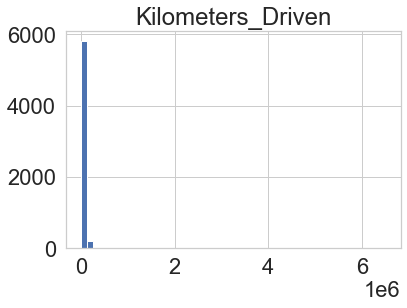

0


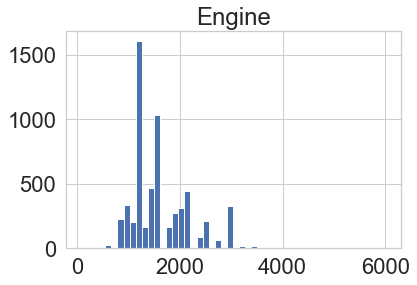

0


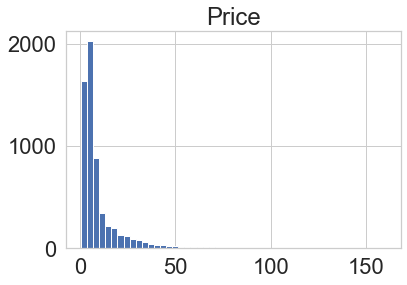

0


In [239]:
cols_to_log = ['Kilometers_Driven', 'Engine','Price']
for colname in cols_to_log:
    plt.hist(df[colname], bins=50)
    plt.title(colname)
    plt.show()
    print(np.sum(df[colname] <= 0))

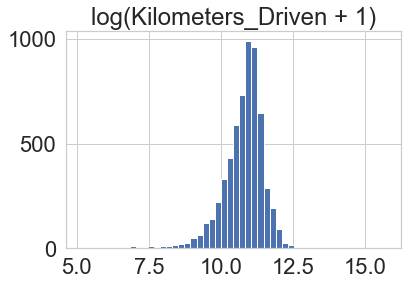

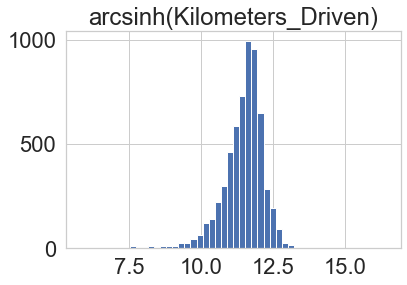

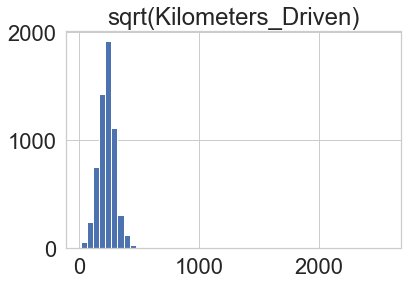

In [240]:
plt.hist(np.log(df['Kilometers_Driven'] + 1), 50)
plt.title('log(Kilometers_Driven + 1)')
plt.show()
plt.hist(np.arcsinh(df['Kilometers_Driven']), 50)
plt.title('arcsinh(Kilometers_Driven)')
plt.show()
plt.hist(np.sqrt(df['Kilometers_Driven']), 50)
plt.title('sqrt(Kilometers_Driven)')
plt.show()

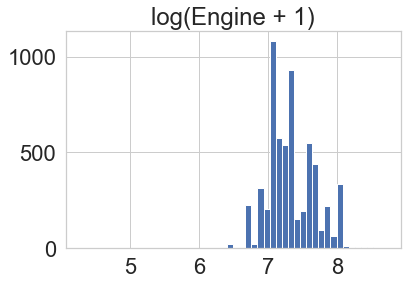

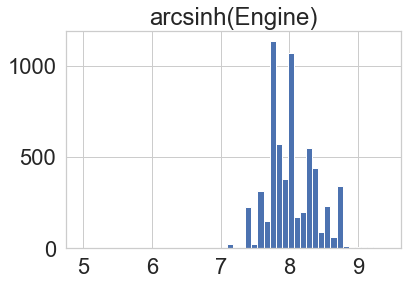

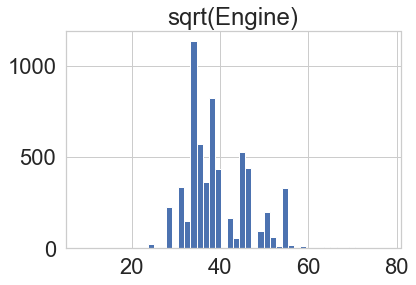

In [241]:
plt.hist(np.log(df['Engine'] + 1), 50)
plt.title('log(Engine + 1)')
plt.show()
plt.hist(np.arcsinh(df['Engine']), 50)
plt.title('arcsinh(Engine)')
plt.show()
plt.hist(np.sqrt(df['Engine']), 50)
plt.title('sqrt(Engine)')
plt.show()

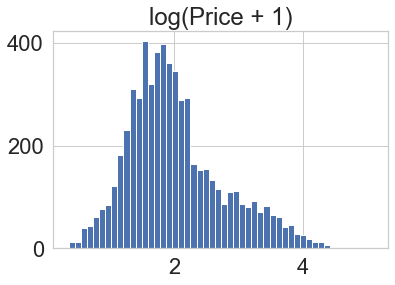

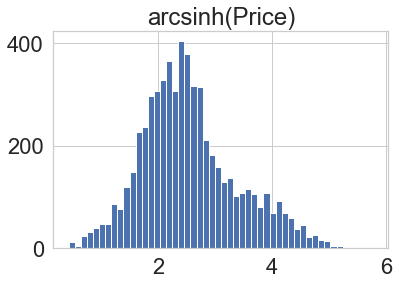

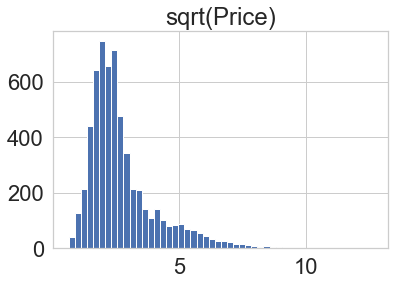

In [242]:
plt.hist(np.log(df['Price'] + 1), 50)
plt.title('log(Price + 1)')
plt.show()
plt.hist(np.arcsinh(df['Price']), 50)
plt.title('arcsinh(Price)')
plt.show()
plt.hist(np.sqrt(df['Price']), 50)
plt.title('sqrt(Price)')
plt.show()

In [243]:
for colname in cols_to_log:
    df[colname + '_log'] = np.log(df[colname] + 1)
df.drop(cols_to_log, axis=1, inplace=True)

Now, all three variables, are closer to the normal distribution shape.

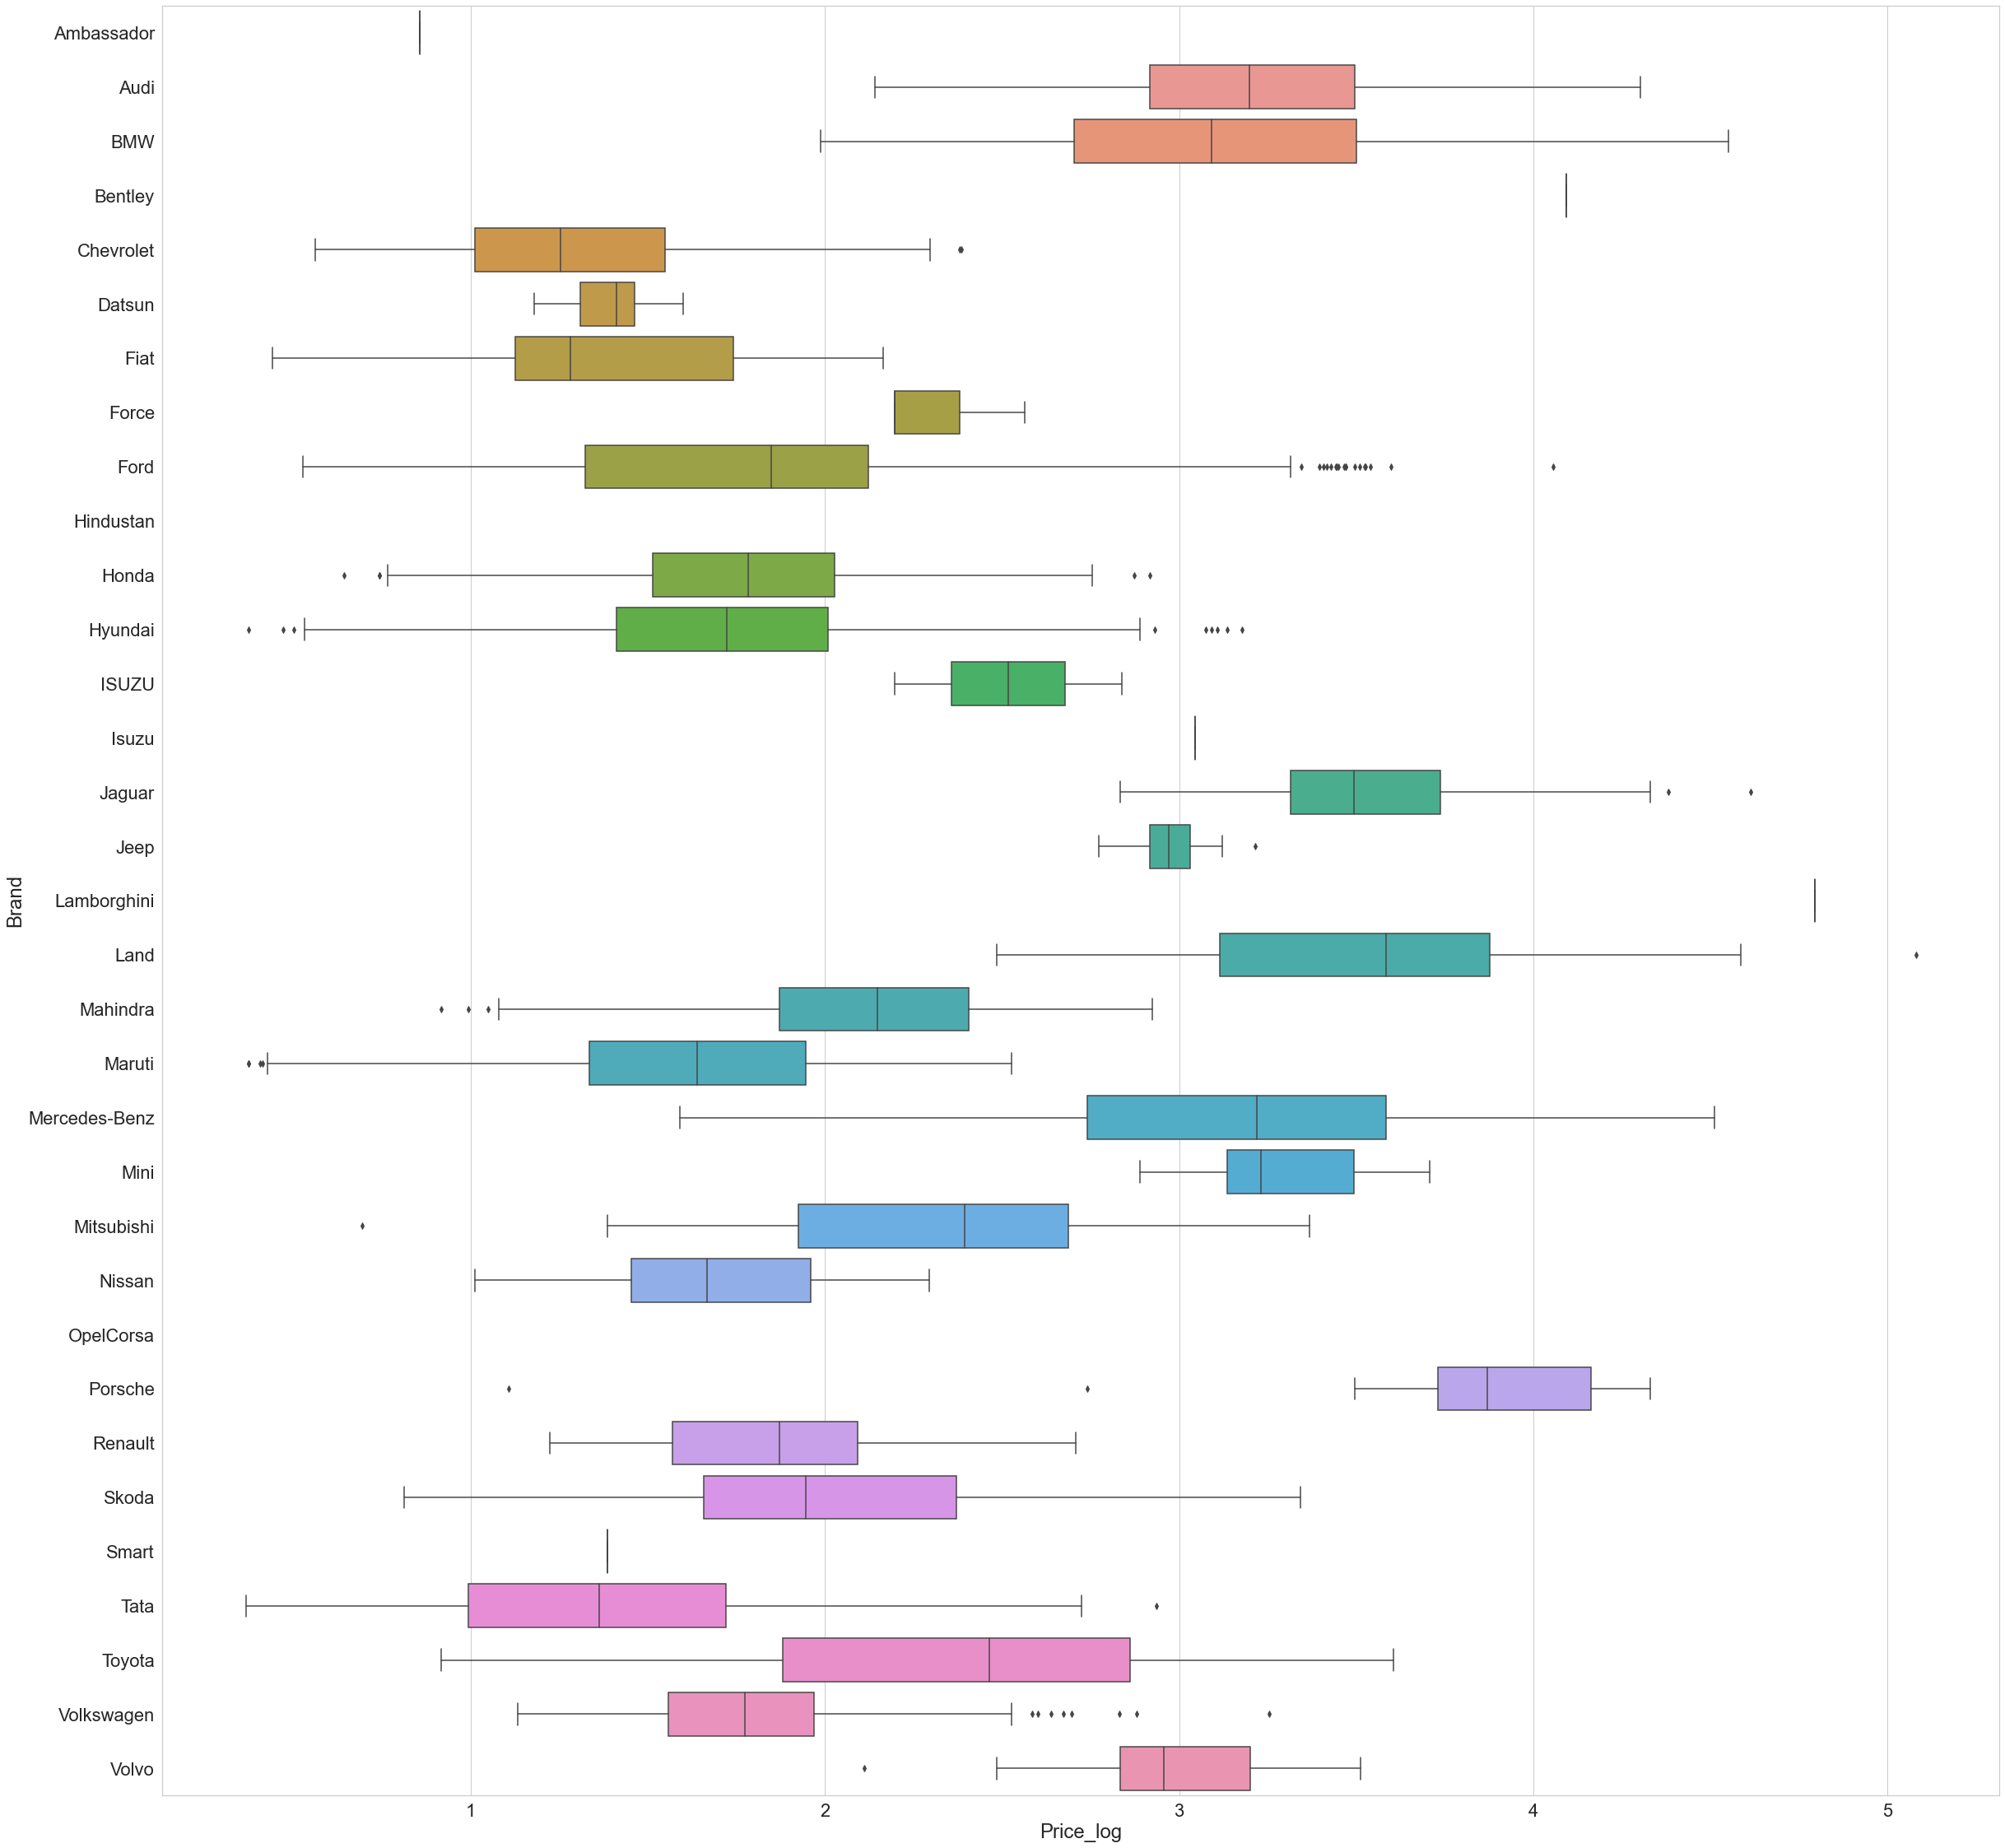

In [244]:

# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (40,40))
a = sns.boxplot(x= "Price_log", y = 'Brand' , data = df)



# <a id = 'link3'>Exploratory Data Analysis</a>

### Univariate Analysis

In [245]:
# While doing univariate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.


def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2)  # setting the font scale for seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid=2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="red"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        feature.mean(), color="g", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Dependent Variable Price

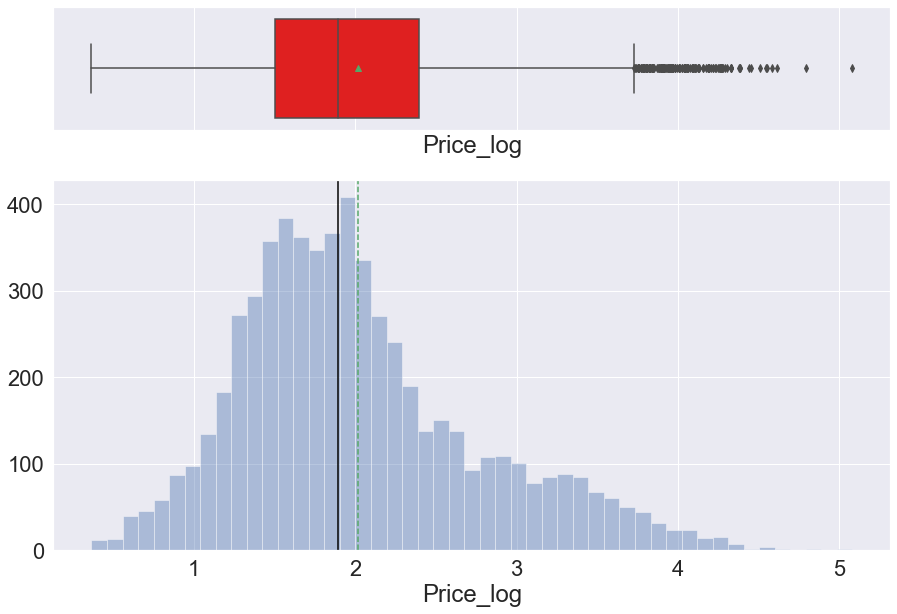

In [246]:
histogram_boxplot(df.Price_log)

- Price_log has a lot outliners probably because of the high value brands, such as Audi, BMW, Jaguar, Land Rover, Mercedes and Porshe.
- Median and mean are very close to each other now.

#### Distribution of each numerical variable

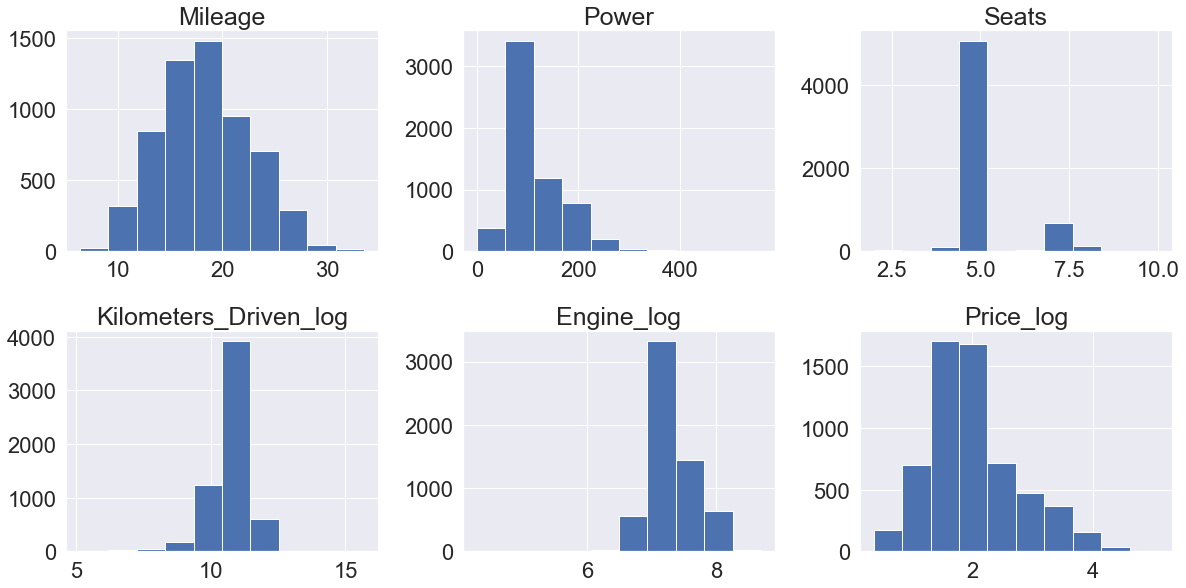

In [247]:
# lets plot histogram of all numerical variables

all_col = df.select_dtypes(include=np.number).columns.tolist()
all_col.remove("Year")
plt.figure(figsize=(17, 75))

for i in range(len(all_col)):
    plt.subplot(18, 3, i + 1)
    plt.hist(df[all_col[i]])
    # sns.histplot(df[all_col[i]], kde=True)  # you can comment the previous line and run this one to get distribution curves
    plt.tight_layout()
    plt.title(all_col[i], fontsize=25)

plt.show()

- Mileage in some way is normal distributed.
- Power is right skewed, meaning most of the cars the BHP Power is below 150 aprox.
- Most of the car have 5 seats, seems to be a constant, would be drop off during the test?

In [248]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

#### Insights per Location

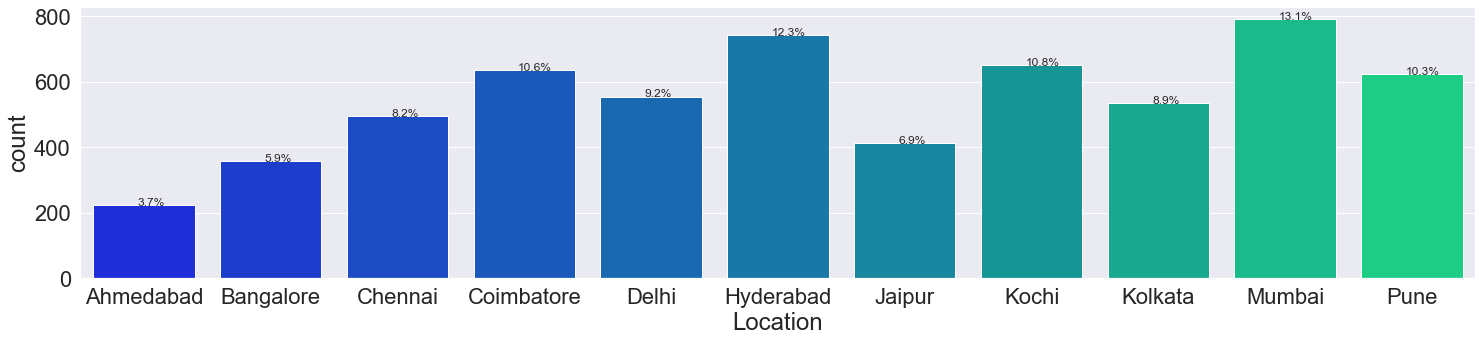

In [249]:
plt.figure(figsize=(25,5))
ax = sns.countplot(df["Location"],palette='winter')
perc_on_bar(ax, df["Location"])

- The most popular market places are Mumbai, Hyderabad, Kochi and Coimbarote

#### Insights per Type_Fuel

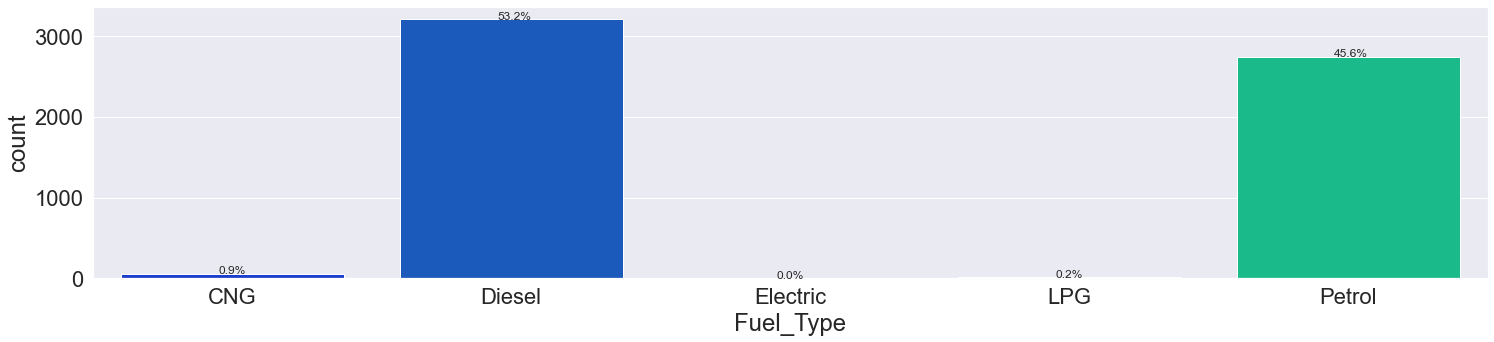

In [250]:
plt.figure(figsize=(25,5))
ax = sns.countplot(df["Fuel_Type"],palette='winter')
perc_on_bar(ax, df["Fuel_Type"])

- Diesel and Petrol are the most popular Type of Fuel

#### Insights per Tranmission

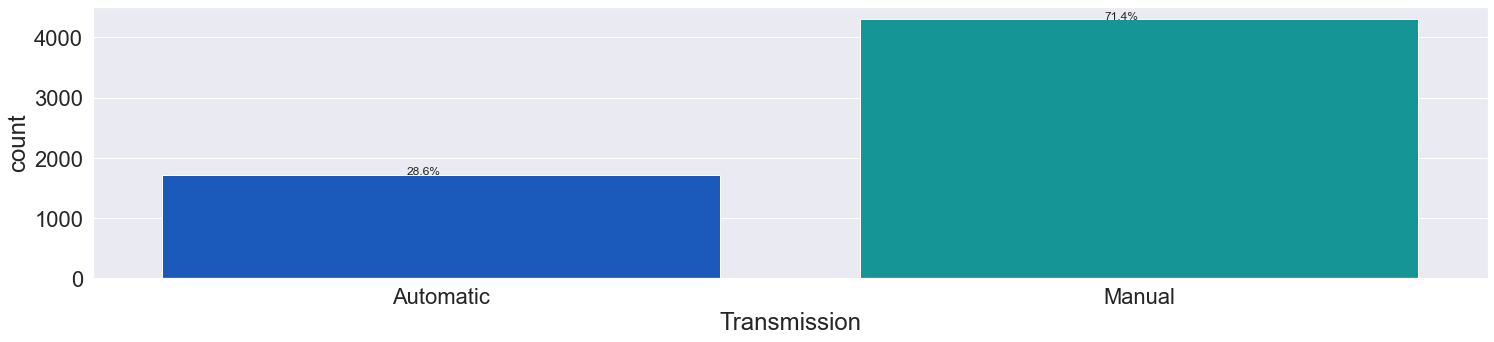

In [251]:
plt.figure(figsize=(25,5))
ax = sns.countplot(df["Transmission"],palette='winter')
perc_on_bar(ax, df["Transmission"])

- Manual cars are the most popular, in the multivariate analysis will check if price varies between manual and automatic transmission.

#### Insights from Owner Type

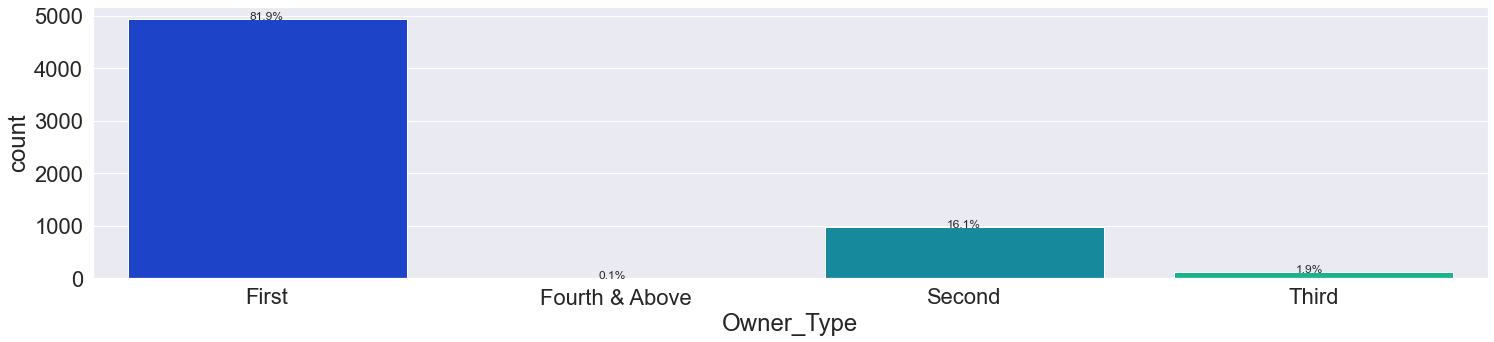

In [252]:
plt.figure(figsize=(25,5))
ax = sns.countplot(df["Owner_Type"],palette='winter')
perc_on_bar(ax, df["Owner_Type"])

- The mayority of the used cars in the marked are a first hand pre-owned

#### Insights from Year

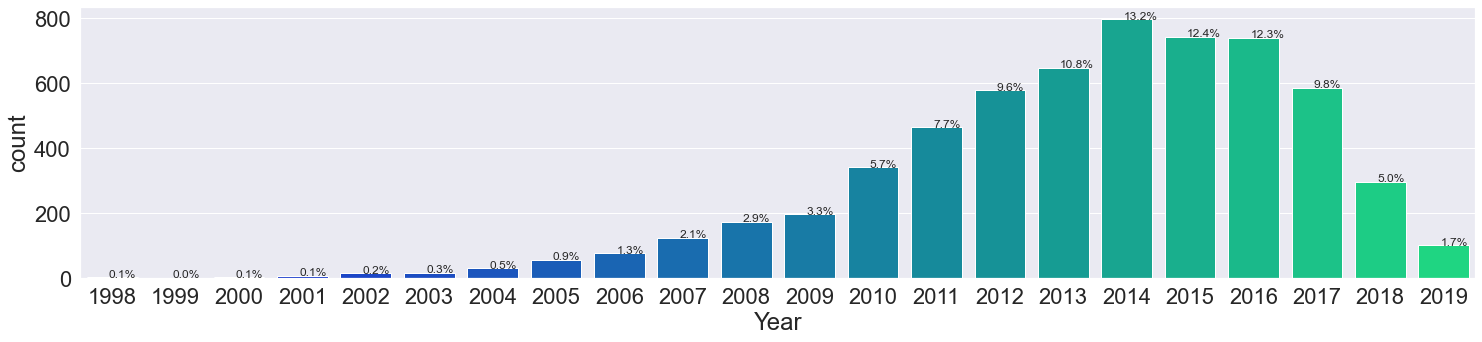

In [253]:
plt.figure(figsize=(25,5))
ax = sns.countplot(df["Year"],palette='winter')
perc_on_bar(ax, df["Year"])

- Customer in general, tends to by more used car that are 6 years old.

### Bivariate Analysis

<AxesSubplot:>

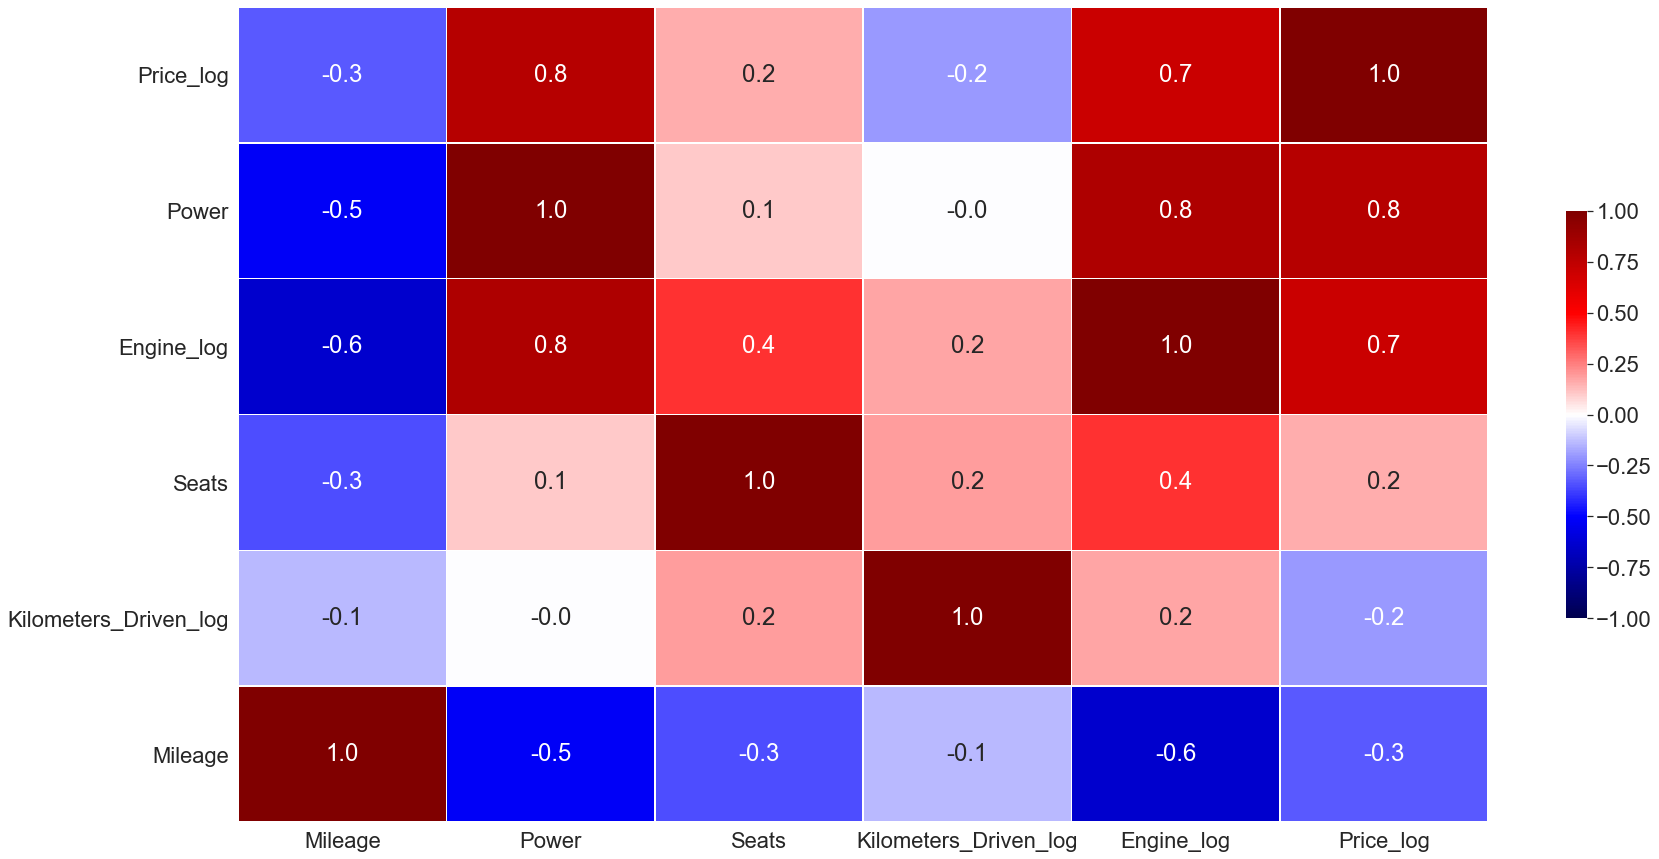

In [254]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("Year")  # dropping year column as it is temporal variable
corr = (
    df[numeric_columns].corr().sort_values(by=["Price_log"], ascending=False)
)  # sorting correlations w.r.t life expectancy

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(28, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    cmap="seismic",
    annot=True,
    fmt=".1f",
    vmin=-1,
    vmax=1,
    center=0,
    square=False,
    linewidths=0.7,
    cbar_kws={"shrink": 0.5},
)

- Per Looking at the heatmap Price is correlated with Power and Engine
- Price is negative correlated with Kilometer driven and Mileage.
- Mileage are negative correlated with seats, power, Engine and kilometer driven.

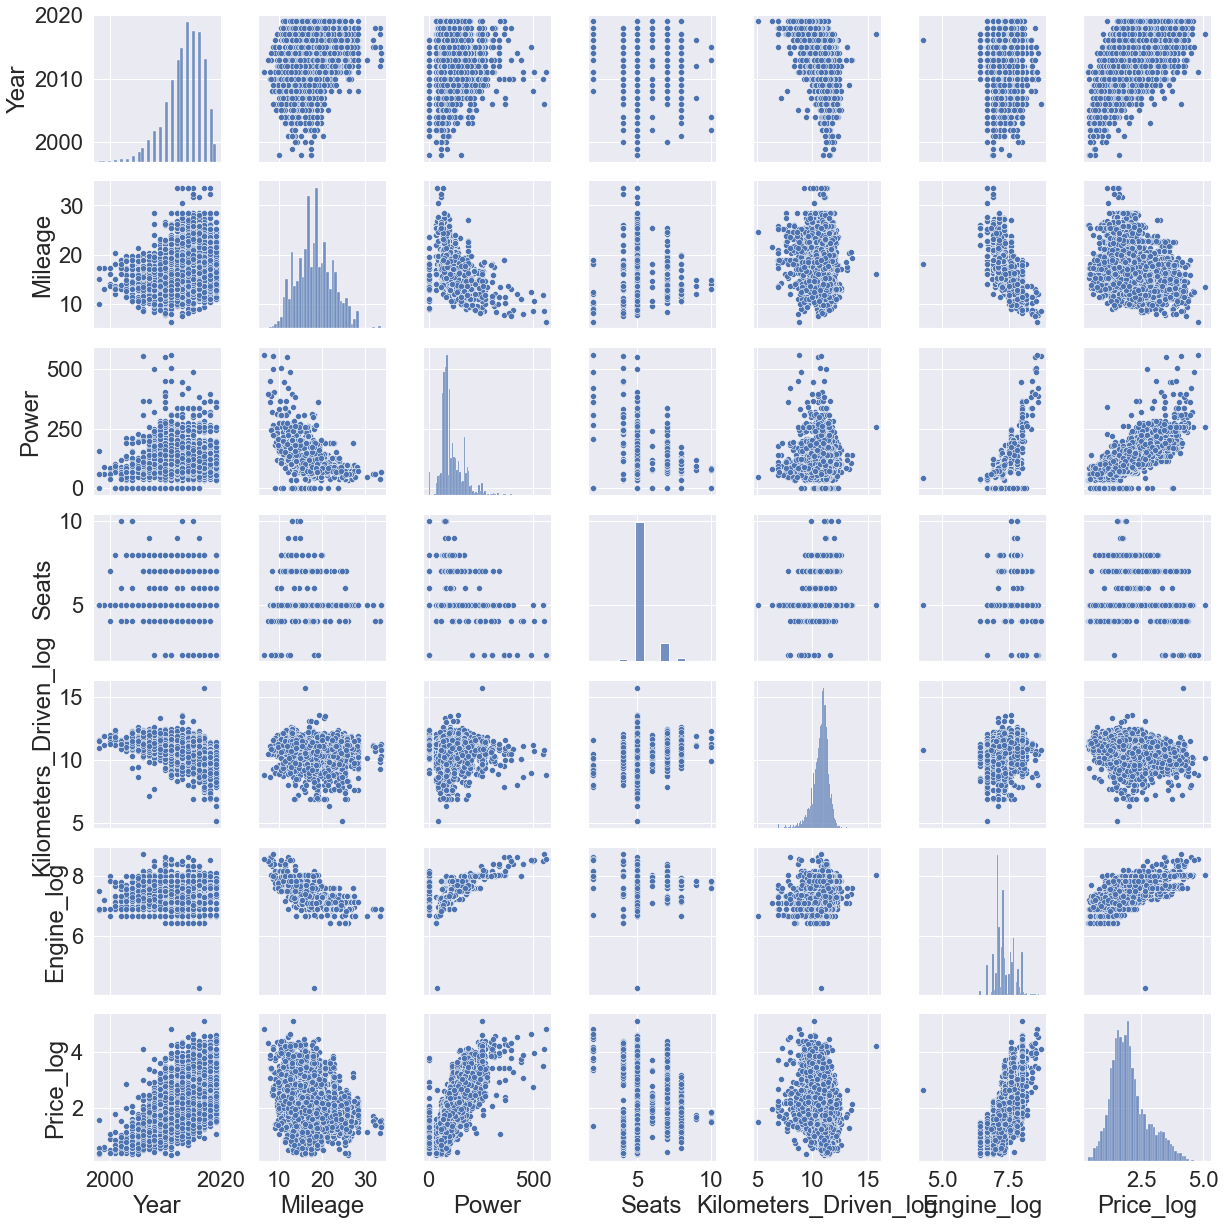

In [255]:
sns.pairplot(data=df)
plt.show()

- We can see varying distributions in variables for different features, we should investigate it further.

### Multivariate Analysis

<AxesSubplot:xlabel='Power', ylabel='Price_log'>

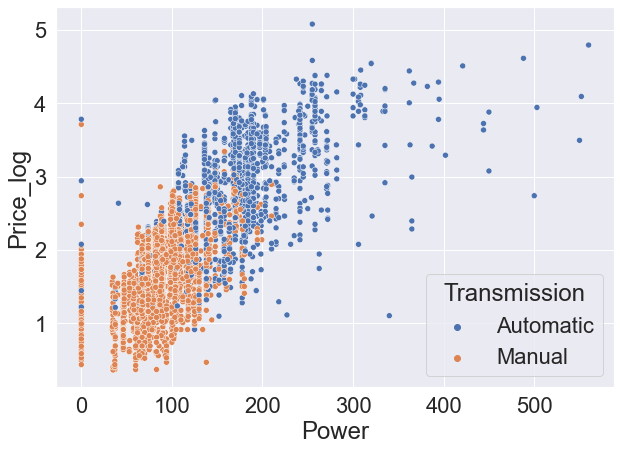

In [256]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="Price_log", x="Power", hue="Transmission", data=df)

- Price v.s. Power: It is very clear that the data is clustered between the automatic and Manual, where the manual seems to be the less expensive and les power of engine in BHP.

<AxesSubplot:xlabel='Engine_log', ylabel='Price_log'>

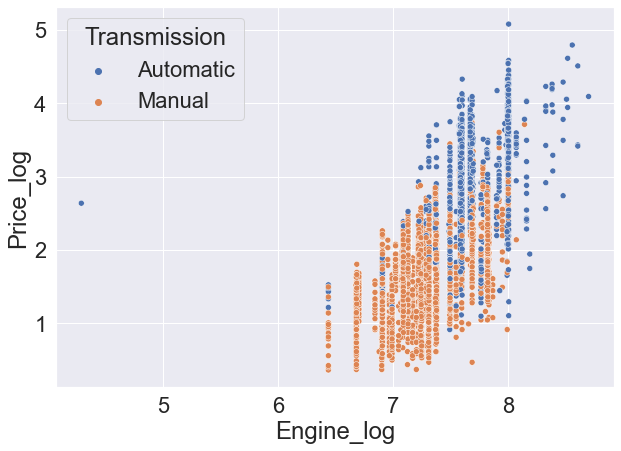

In [257]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="Price_log", x="Engine_log", hue="Transmission", data=df)

- Price vs Engine: again based on the size of the engine, manual cars has the smallest size of the engine and also, the less expensive

#### Lets check Price vs Year

<AxesSubplot:xlabel='Year', ylabel='Price_log'>

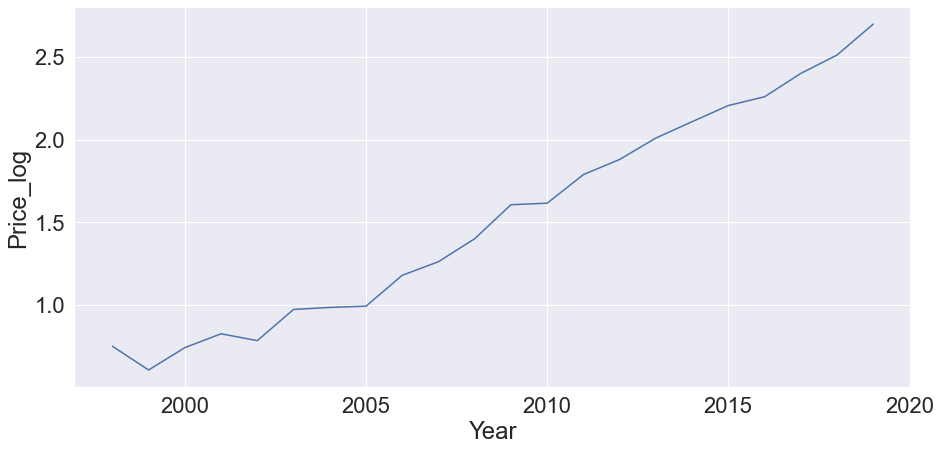

In [258]:
# average Price over the years
plt.figure(figsize=(15, 7))
sns.lineplot(x="Year", y="Price_log", data=df, ci=None)

- It is positive corrataled, means as car get older, gains more kilometers driven, it gets deterioreted and losses value as well.

#### Median Price by Brand and Transmission

<AxesSubplot:xlabel='Transmission', ylabel='Brand'>

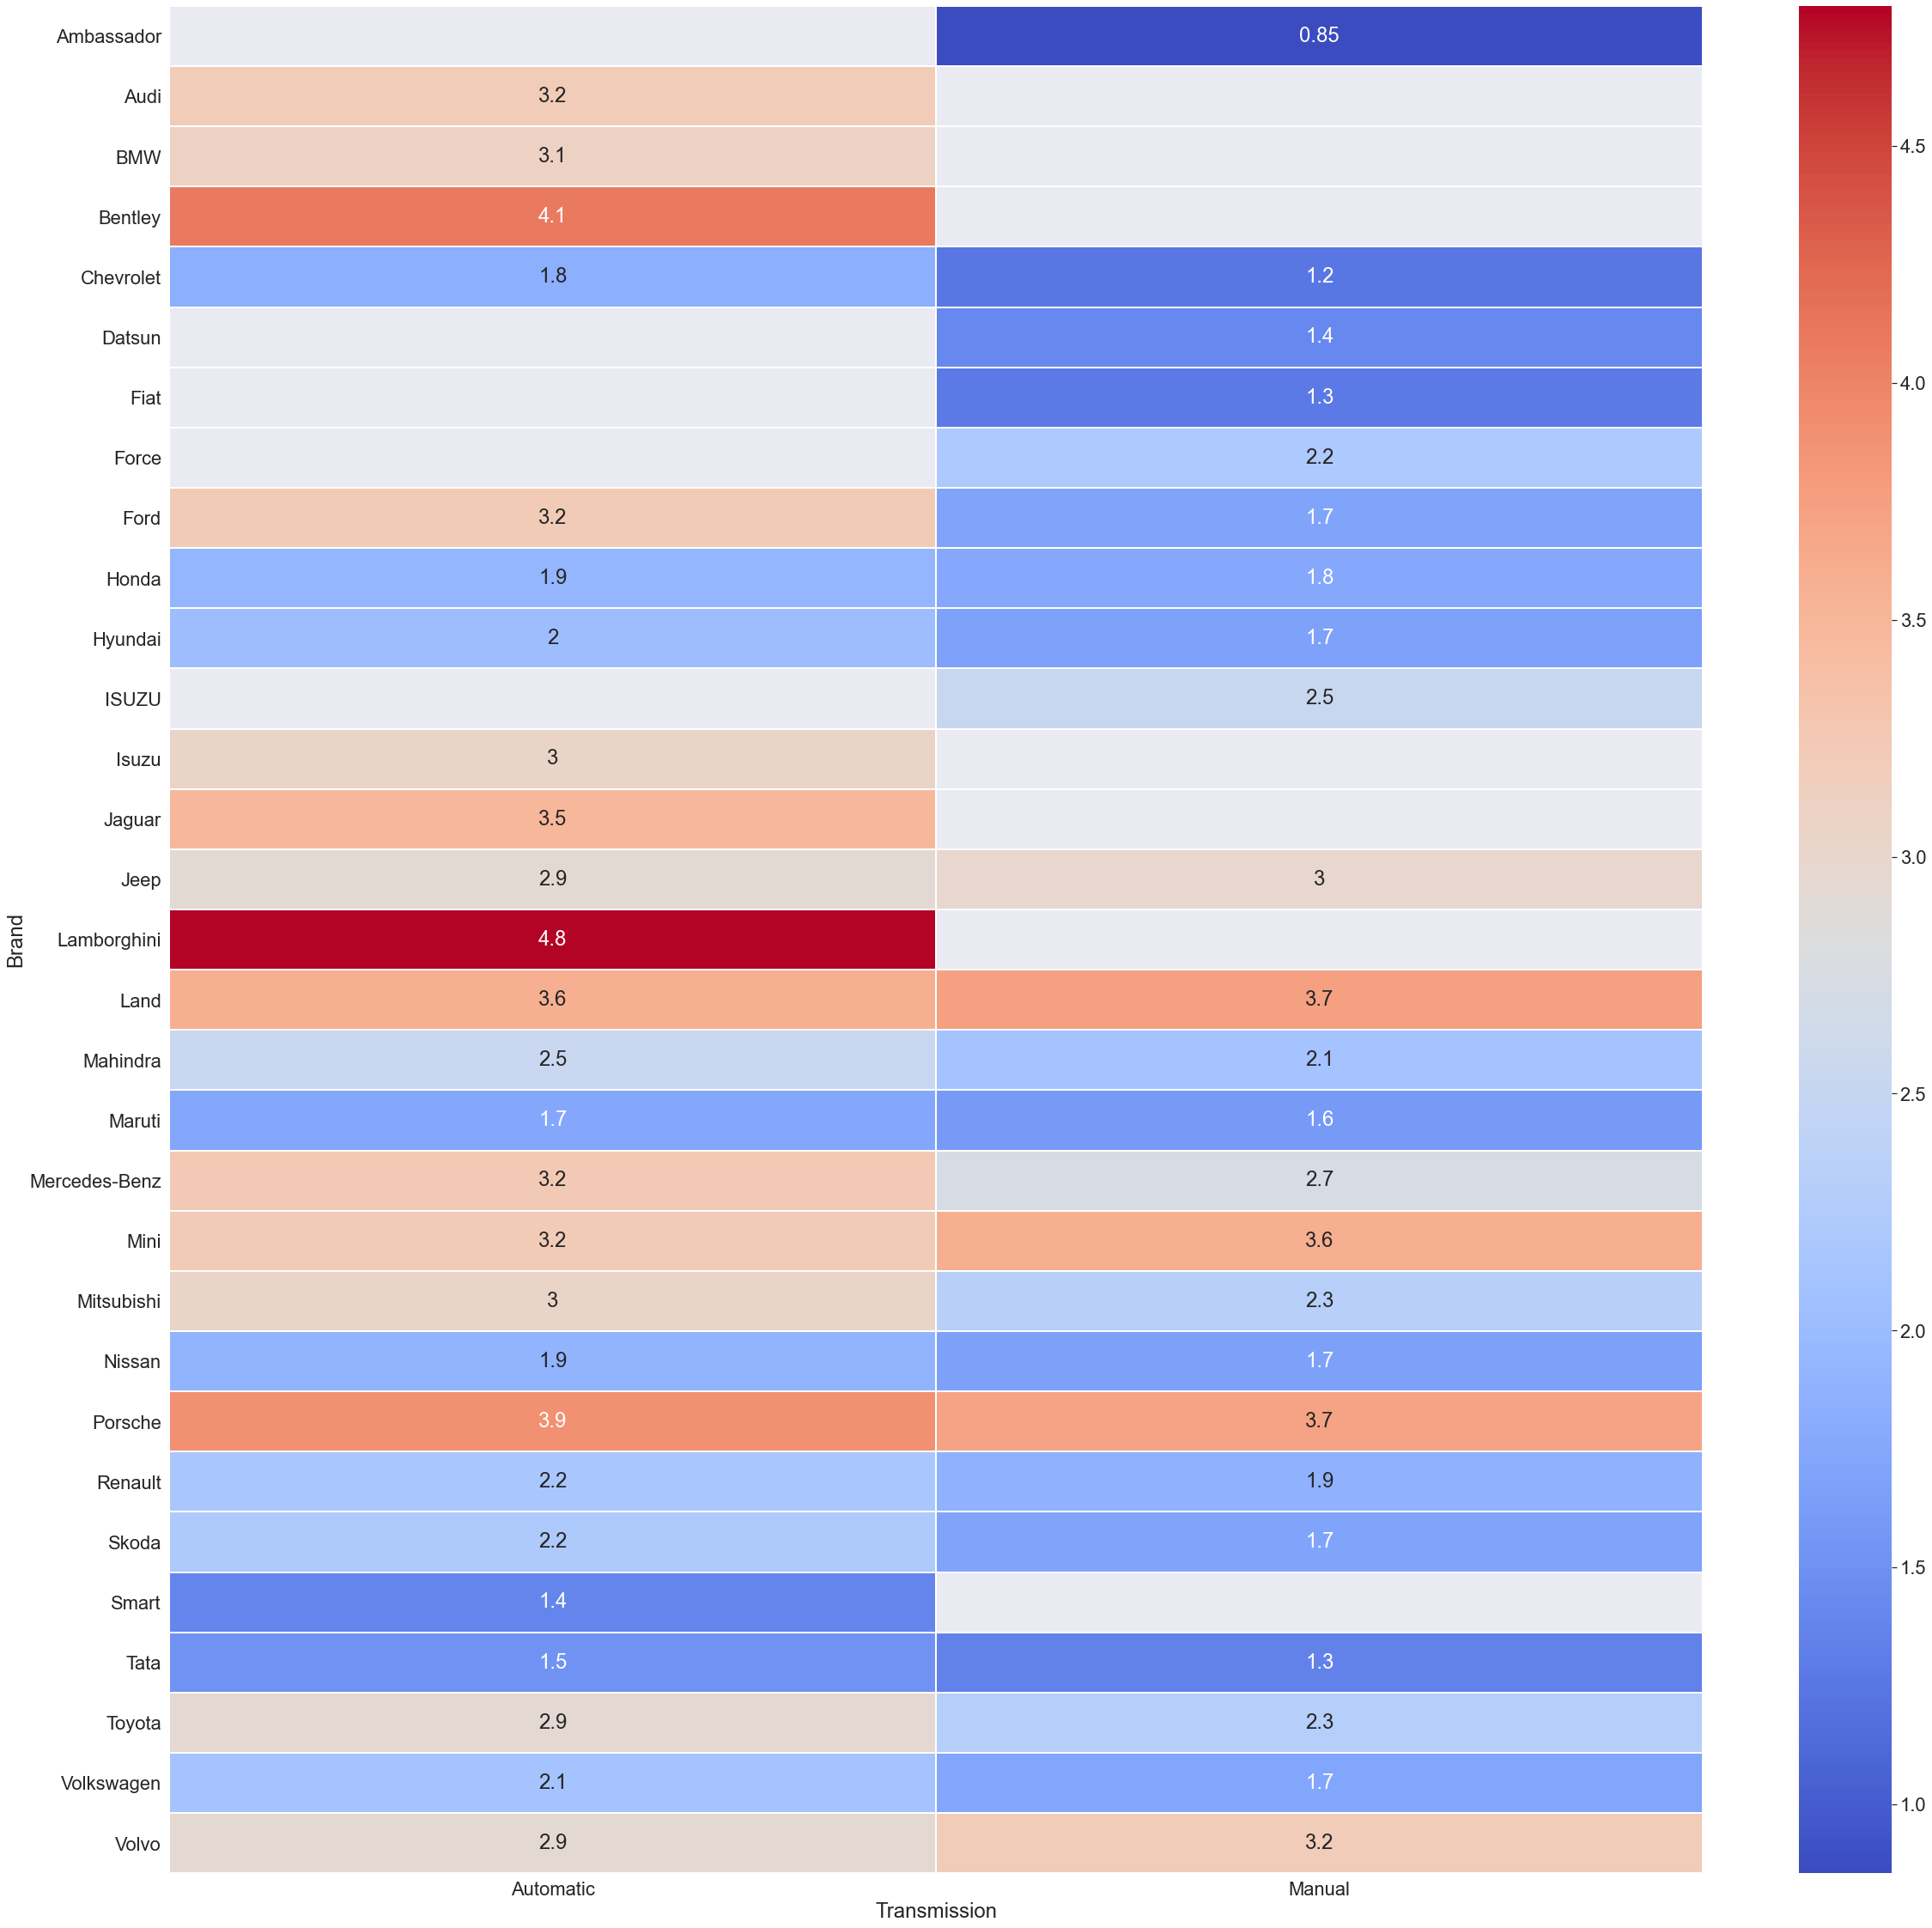

In [259]:
df_hm = df.pivot_table(
    index="Brand", columns="Transmission", values="Price_log", aggfunc=np.median
)

# Draw a heatmap
f, ax = plt.subplots(figsize=(40,40))
sns.heatmap(df_hm, cmap="coolwarm", linewidths=1, annot=True, ax=ax)

- If the data provided is discriminated by brand, in general, automatic cars are more expensive than manual, however, this statement doesn't apply for Land Rovers, Minis and Jeeps.
- Over all, Lamborghinis are the most expensive cars in the market, being an outiner.

#### Price by Brand vs Transmission

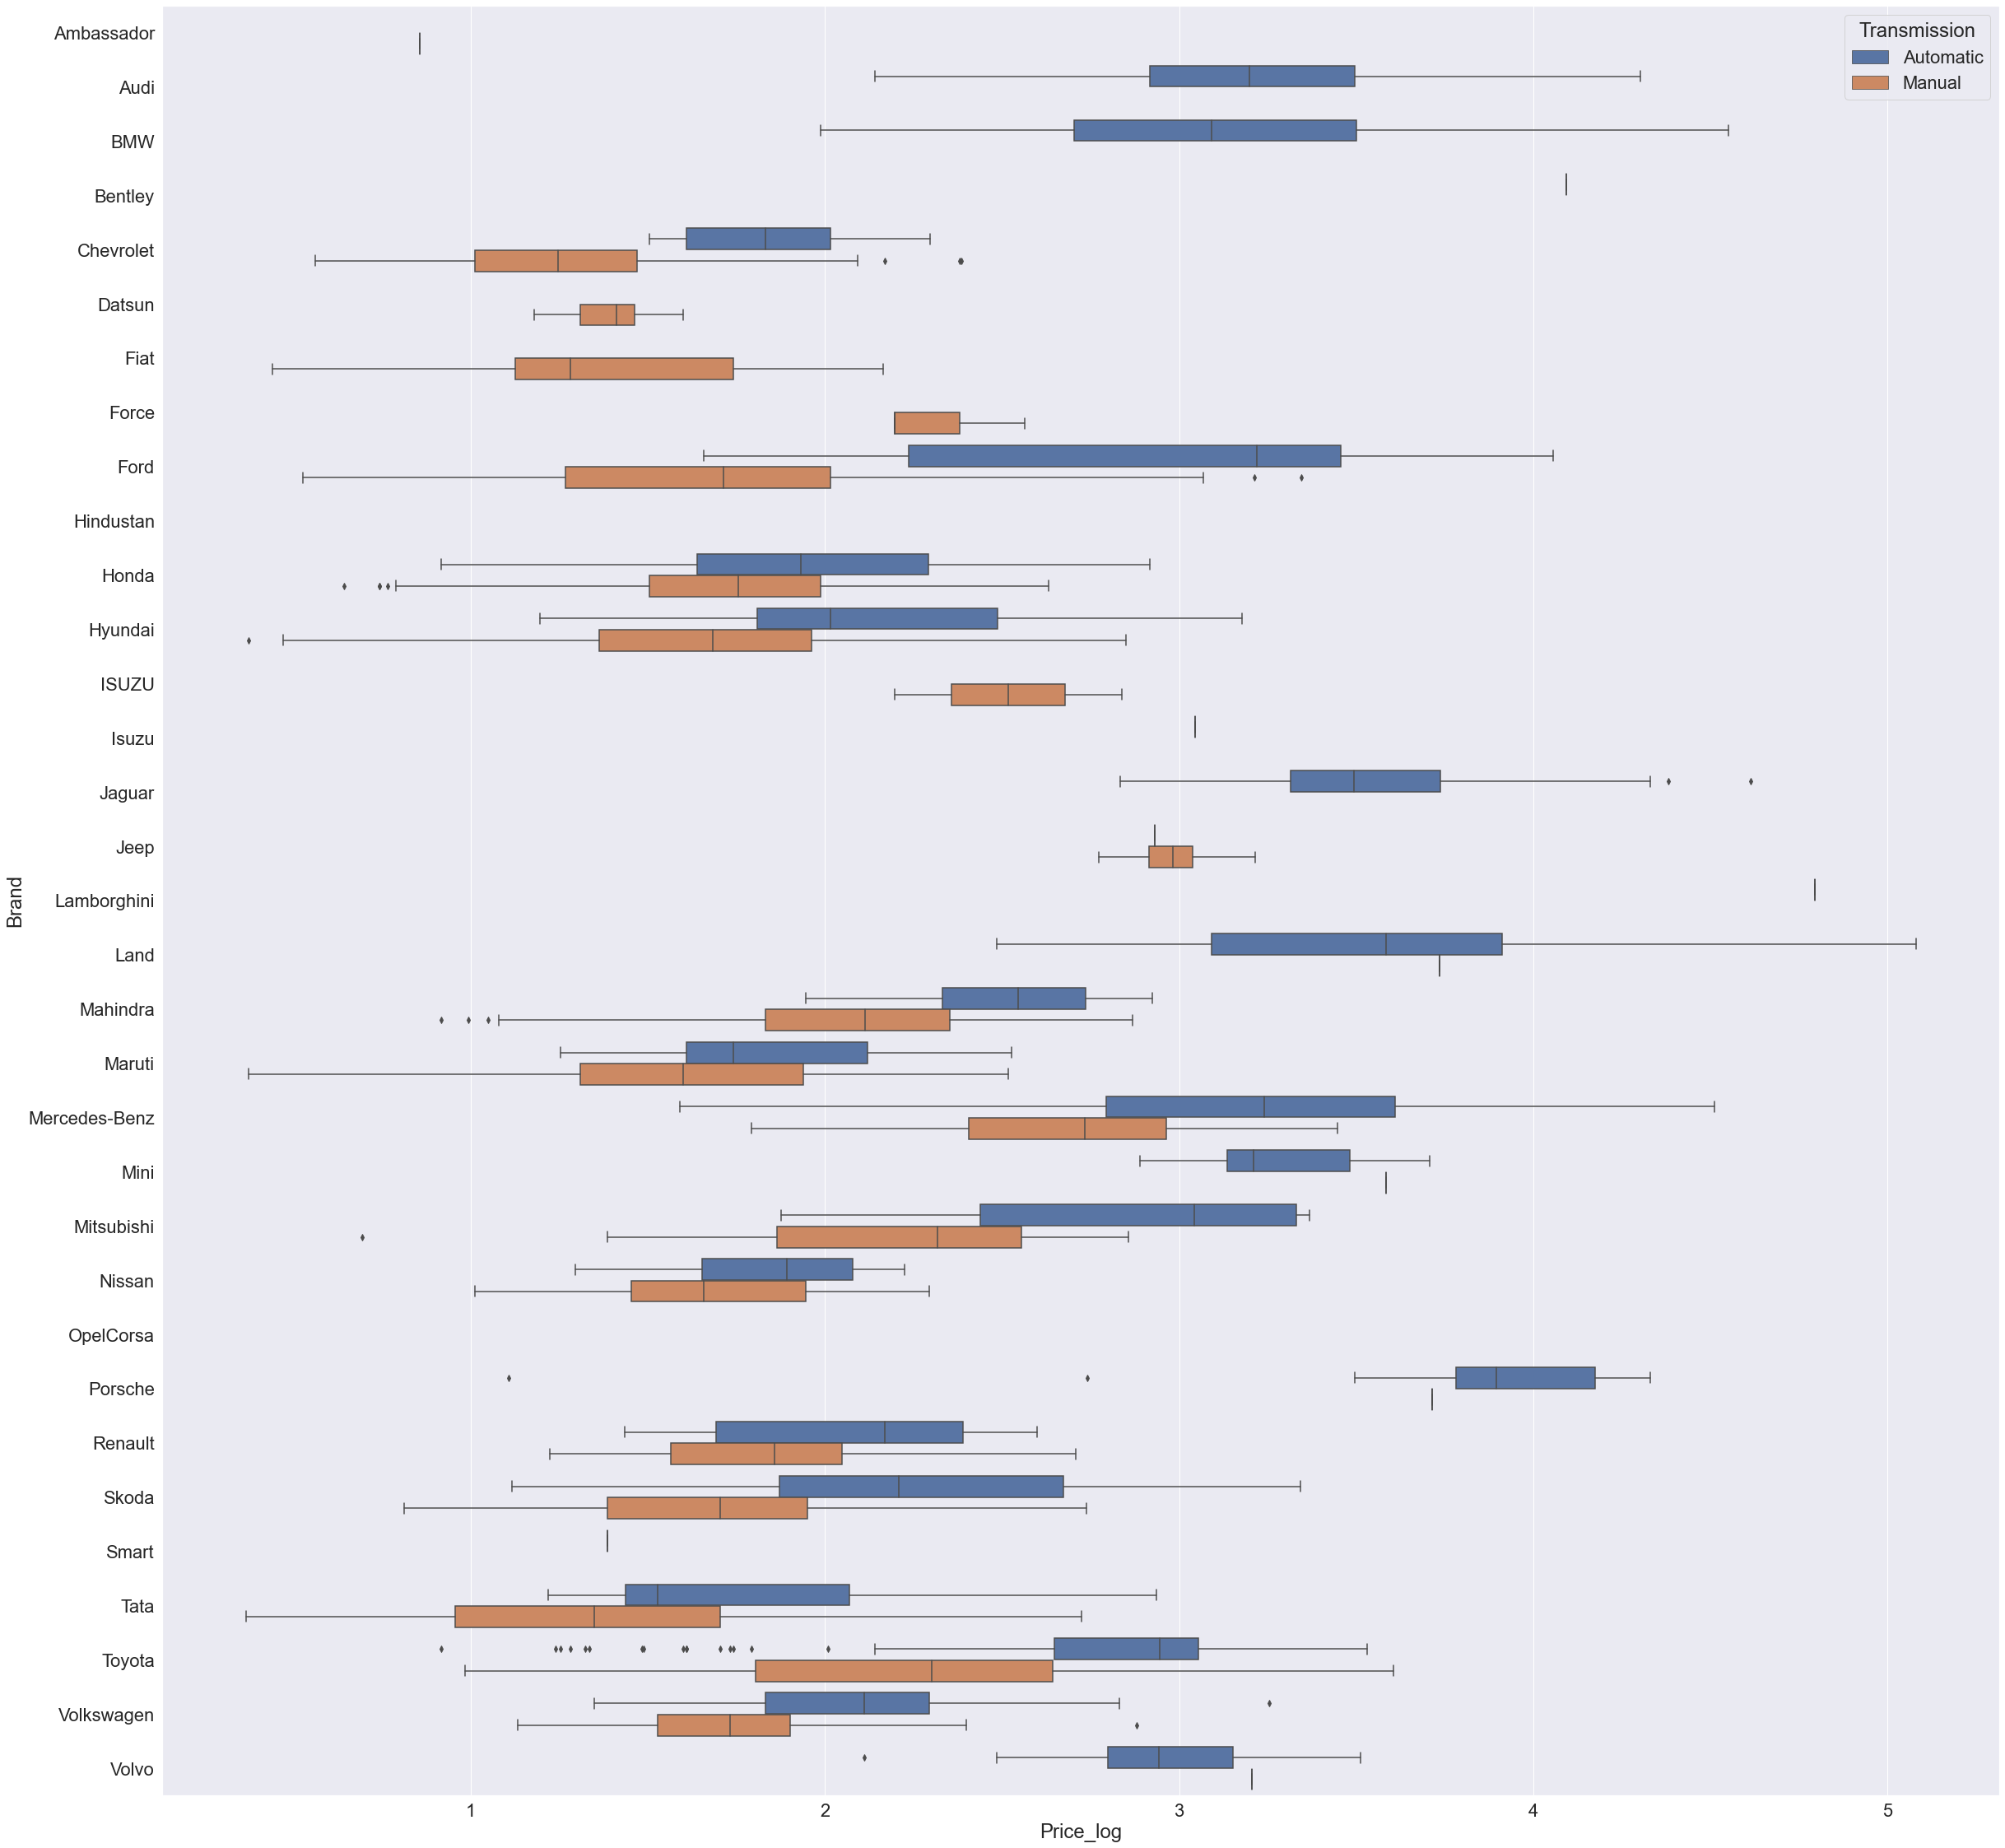

In [260]:
plt.figure(figsize=(40, 40))
sns.boxplot(y="Brand", x="Price_log", data=df, hue="Transmission")
plt.show()

- Apparently, we can find in the market place a veru economic brands like chevrolet, Datsun, Tata, and Maruti, it doesnt mean are the most popular options, except for the Maruti.
- Mercedes-Benz are one of the top more popular but also in sot the most economic option.

#### Outliners

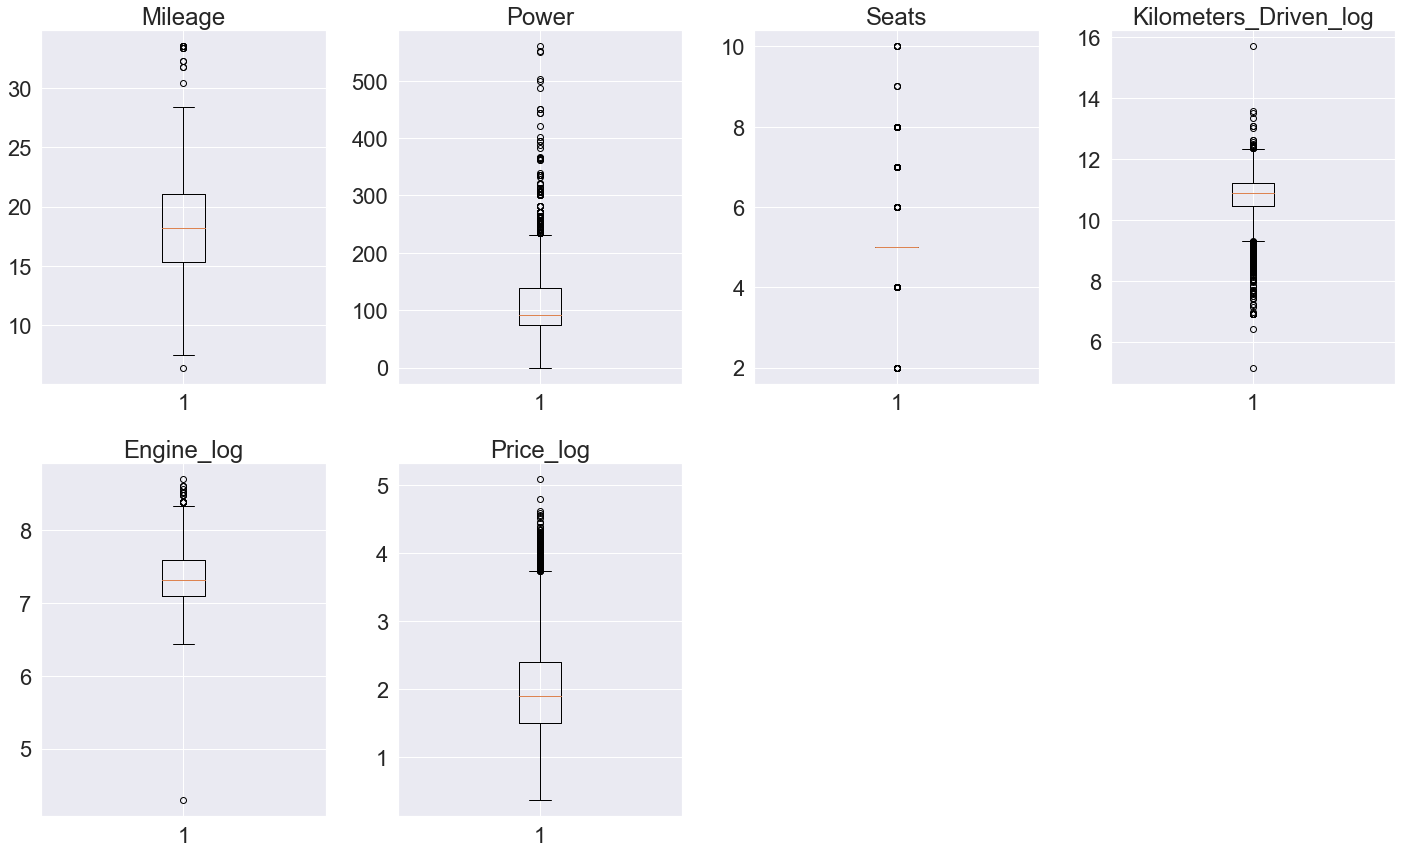

In [261]:
# let's plot the boxplots of all columns to check for outliers
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- Mileage has the lowest quantity of outliners.
- Again, seats seems to be constant among the mayority of the cars in the market place, by having just 5 seats.
- Kilometers driven has the most either up or down outliners.
- All other numerical columns have more upper outliners.
- It will be treated these outliers as these might adversely affect the predictive power of linear model. However, in real life, these outliers may be due to non-linear pattern in the data or can be important information.

#### Outliners Treatment

In [262]:
# Let's treat outliers by flooring and capping
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [263]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df, numerical_col)

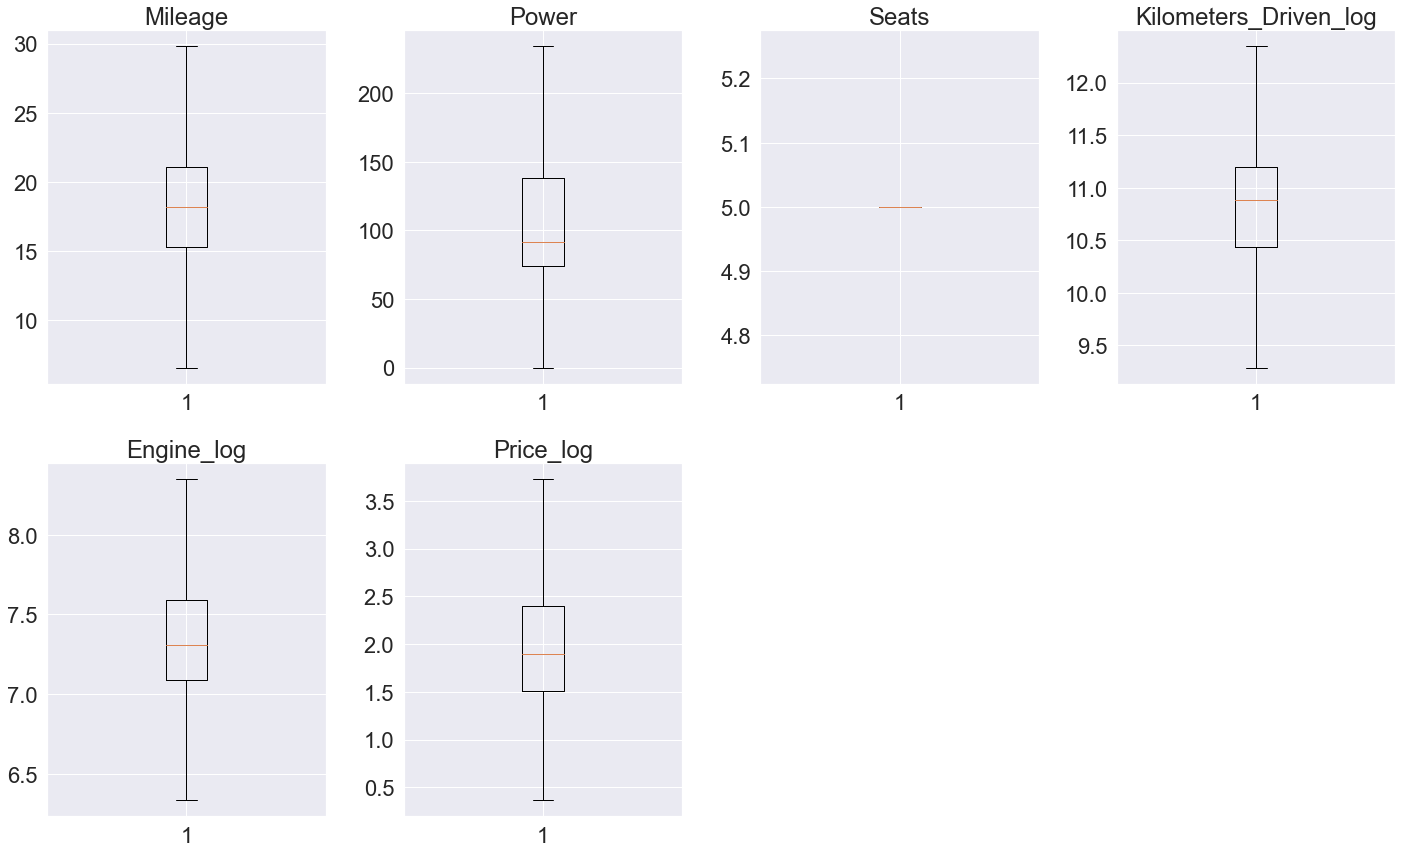

In [264]:
# let's look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

# <a id = 'link4'>Data Preparation for Modeling</a>


In [265]:
df.head()

,Brand,Class,Model,Name,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Power,Seats,Kilometers_Driven_log,Engine_log,Price_log
S.No.,,,,,,,,,,,,,,,
0,Maruti,Wagon R LXI CNG,wagon,Maruti Wagon R LXI CNG,Mumbai,2010.000,CNG,Manual,First,26.600,58.160,5.000,11.184,6.907,1.012
1,Hyundai,Creta 1.6 CRDi SX Option,creta,Hyundai Creta 1.6 CRDi SX Option,Pune,2015.000,Diesel,Manual,First,19.670,126.200,5.000,10.621,7.367,2.603
2,Honda,Jazz V,jazz,Honda Jazz V,Chennai,2011.000,Petrol,Manual,First,18.200,88.700,5.000,10.736,7.090,1.705
3,Maruti,Ertiga VDI,ertiga,Maruti Ertiga VDI,Chennai,2012.000,Diesel,Manual,First,20.770,88.760,5.000,11.374,7.130,1.946
4,Audi,A4 New 2.0 TDI Multitronic,a4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013.000,Diesel,Automatic,Second,15.200,140.800,5.000,10.613,7.585,2.931


In [266]:
# defining X and y variables
X = df.drop(["Price_log","Brand","Class","Seats","Model","Name"], axis=1)
y = df[["Price_log"]]

print(X.head())
print(y.head())

         Location     Year Fuel_Type Transmission Owner_Type  Mileage   Power  \
S.No.                                                                           
0          Mumbai 2010.000       CNG       Manual      First   26.600  58.160   
1            Pune 2015.000    Diesel       Manual      First   19.670 126.200   
2         Chennai 2011.000    Petrol       Manual      First   18.200  88.700   
3         Chennai 2012.000    Diesel       Manual      First   20.770  88.760   
4      Coimbatore 2013.000    Diesel    Automatic     Second   15.200 140.800   

       Kilometers_Driven_log  Engine_log  
S.No.                                     
0                     11.184       6.907  
1                     10.621       7.367  
2                     10.736       7.090  
3                     11.374       7.130  
4                     10.613       7.585  
       Price_log
S.No.           
0          1.012
1          2.603
2          1.705
3          1.946
4          2.931


In [267]:
print(X.shape)
print(y.shape)

(6019, 9)
(6019, 1)


In [268]:
# creating dummy variables
X = pd.get_dummies(X, columns=["Location","Fuel_Type", "Transmission","Owner_Type"], drop_first=True)
X.head()

,Year,Mileage,Power,Kilometers_Driven_log,Engine_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
S.No.,,,,,,,,,,,,,,,,,,,,,,,
0,2010.000,26.600,58.160,11.184,6.907,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,2015.000,19.670,126.200,10.621,7.367,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
2,2011.000,18.200,88.700,10.736,7.090,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,2012.000,20.770,88.760,11.374,7.130,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,2013.000,15.200,140.800,10.613,7.585,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [269]:
# split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [270]:
X_train.head()

,Year,Mileage,Power,Kilometers_Driven_log,Engine_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
S.No.,,,,,,,,,,,,,,,,,,,,,,,
4201,2011.000,22.070,73.900,11.252,7.090,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
4383,2016.000,20.360,78.900,9.901,7.088,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0
1779,2014.000,15.100,140.000,11.170,7.687,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4020,2013.000,25.200,74.000,11.654,7.130,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
3248,2011.000,16.470,73.900,10.981,7.089,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0


In [271]:
# fitting the model on the train data (70% of the whole data)
from sklearn.linear_model import LinearRegression

linearregression = LinearRegression()
linearregression.fit(X_train, y_train)

LinearRegression()

In [272]:
# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(linearregression.coef_[0], linearregression.intercept_[0]),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

,Coefficients
Year,0.081
Mileage,-0.009
Power,0.006
Kilometers_Driven_log,-0.126
Engine_log,0.480
Location_Bangalore,0.114
Location_Chennai,-0.020
Location_Coimbatore,0.091
Location_Delhi,-0.074
Location_Hyderabad,0.084


In [273]:
# defining function for MAPE
def mape(targets, predictions):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# defining common function for all metrics
def model_perf(model, inp, out):
    """
    model: model
    inp: independent variables
    out: dependent variable
    """
    y_pred = model.predict(inp).flatten()
    y_act = out.values.flatten()

    return pd.DataFrame(
        {
            "MAE": mean_absolute_error(y_act, y_pred),
            "MAPE": mape(y_act, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "R^2": r2_score(y_act, y_pred),
        },
        index=[0],
    )

In [274]:
# Checking model performance on train set (seen 70% data)
print("Train Performance\n")
model_perf(linearregression, X_train, y_train)

Train Performance



,MAE,MAPE,RMSE,R^2
0,0.186,10.595,0.246,0.884


In [275]:
# Checking model performance on test set (unseen 30% data)
print("Test Performance\n")
model_perf(linearregression, X_test, y_test)

Test Performance



,MAE,MAPE,RMSE,R^2
0,0.193,11.257,0.261,0.875


# Observations:

- The training and testing scores are 88.4% and 87.5% respectively, and both scores are comparable. Hence, the model is a good fit.

- R-squared is 0.875 on the test set, i.e., the model explains 88% of total variation in the test dataset. So, overall the model is very satisfactory.

- MAE indicates that our current model is able to predict the price of an used car in the Indian Marketplace within a mean error of 0.193 years on the test data.

- MAPE on the test set suggests it can be predicted within 11.25% of the price of an used car in the Indian Marketplace.


### Linear Regression Using Statsmodels

In [276]:
# Let's build linear regression model using statsmodel
# unlike sklearn, statsmodels does not add a constant to the data on its own
# we have to add the constant manually
X = sm.add_constant(X)
X_train1, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

olsmod0 = sm.OLS(y_train, X_train1)
olsres0 = olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1385.
Date:                Sun, 03 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:26:35   Log-Likelihood:                -70.827
No. Observations:                4213   AIC:                             189.7
Df Residuals:                    4189   BIC:                             342.0
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### Observations

- Negative values of the coefficient show that Price decreases with the increase of corresponding attribute value.

- Positive values of the coefficient show that Price increases with the increase of corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant. Meaning that attributes such as Fuel Type Electric Fuel LPG or Owner Type Fourth and above are not significant.

- But these variables might contain multicollinearity, which will affect the p-values.

- So, we need to deal with multicollinearity and check the other assumptions of linear regression first, and then look at the p-values.

# <a id = 'link5'>Test Assumptions of linear regresion model</a>

We will be checking the following Linear Regression assumptions:

1. No Multicollinearity

2. Mean of residuals should be 0

3. No Heteroscedasticity

4. Linearity of variables

5. Normality of error terms

#### TEST FOR MULTICOLLINEARITY



- Check if the variables of the regression model are correlated. Variables needs to show independencuy from each other. 

- Use Variation Inflation Factor (VIF) to detect Multicollinearity.

- General Rule of thumb: If VIF = 1 then there is no correlation among the kth predictor.Whereas, if VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity, and if it is 10 or exceeding 10, it shows signs of high multicollinearity.

In [277]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns
)
print("VIF Scores: \n\n{}\n".format(vif_series1))

VIF Scores: 

const                       840259.998
Year                             2.094
Mileage                          3.286
Power                            4.651
Kilometers_Driven_log            1.836
Engine_log                       7.036
Location_Bangalore               2.472
Location_Chennai                 2.982
Location_Coimbatore              3.520
Location_Delhi                   3.166
Location_Hyderabad               3.812
Location_Jaipur                  2.676
Location_Kochi                   3.572
Location_Kolkata                 3.139
Location_Mumbai                  4.006
Location_Pune                    3.429
Fuel_Type_Diesel                28.389
Fuel_Type_Electric               1.043
Fuel_Type_LPG                    1.194
Fuel_Type_Petrol                28.754
Transmission_Manual              1.857
Owner_Type_Fourth & Above        1.013
Owner_Type_Second                1.171
Owner_Type_Third                 1.104
dtype: float64



- Theres 3 variables with VIF greater than 5. Where, type of fuel diesel and petrol shows a high correlation.
- Fuel_Type_Petro will be dropped because is the highest VIF number.

#### Removing Multicollinearity

To remove multicollinearity

1. Drop every column one by one that has VIF score greater than 5.
2. Look at the adjusted R-squared of all these models.
3. Drop the variable that makes least change in adjusted R-squared.
4. Check the VIF scores again.
4. Continue till you get all VIF scores under 5.

In [278]:
# we drop the one with the highest vif values and check the adjusted R-squared
X_train2 = X_train1.drop("Fuel_Type_Petrol", axis=1)
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
)
print("VIF Scores: \n\n{}\n".format(vif_series2))

VIF Scores: 

const                       845247.010
Year                             2.072
Mileage                          3.264
Power                            4.641
Kilometers_Driven_log            1.808
Engine_log                       7.198
Location_Bangalore               2.582
Location_Chennai                 2.989
Location_Coimbatore              3.584
Location_Delhi                   3.245
Location_Hyderabad               3.880
Location_Jaipur                  2.681
Location_Kochi                   3.652
Location_Kolkata                 3.205
Location_Mumbai                  4.053
Location_Pune                    3.510
Fuel_Type_Diesel                 2.506
Fuel_Type_Electric               1.013
Fuel_Type_LPG                    1.011
Transmission_Manual              1.866
Owner_Type_Fourth & Above        1.010
Owner_Type_Second                1.168
Owner_Type_Third                 1.111
dtype: float64



- That seemed to have helped, VIF has come down to quite a good limit, now we can say features are not correlated.
- Engine_Log still show a high VIF, but modearated milticollinearity.

In [279]:
olsmod1 = sm.OLS(y_train, X_train2)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1444.
Date:                Sun, 03 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:26:38   Log-Likelihood:                -76.285
No. Observations:                4213   AIC:                             198.6
Df Residuals:                    4190   BIC:                             344.5
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

- Keeps the same adjusted R-squared 0.881
- Let's check if by dropping Engine_log, it gets better results


In [280]:
X_train3 = X_train1.drop("Engine_log", axis=1)
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])],
    index=X_train3.columns,
)
print("VIF Scores: \n\n{}\n".format(vif_series3))

VIF Scores: 

const                       844834.005
Year                             2.070
Mileage                          1.999
Power                            2.860
Kilometers_Driven_log            1.809
Location_Bangalore               2.582
Location_Chennai                 2.992
Location_Coimbatore              3.586
Location_Delhi                   3.244
Location_Hyderabad               3.882
Location_Jaipur                  2.684
Location_Kochi                   3.652
Location_Kolkata                 3.208
Location_Mumbai                  4.048
Location_Pune                    3.509
Fuel_Type_Diesel                28.458
Fuel_Type_Electric               1.034
Fuel_Type_LPG                    1.221
Fuel_Type_Petrol                28.724
Transmission_Manual              1.856
Owner_Type_Fourth & Above        1.010
Owner_Type_Second                1.168
Owner_Type_Third                 1.110
dtype: float64



In [281]:
olsmod2 = sm.OLS(y_train, X_train3)
olsres2 = olsmod2.fit()
print(olsres2.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     1356.
Date:                Sun, 03 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:26:39   Log-Likelihood:                -193.48
No. Observations:                4213   AIC:                             433.0
Df Residuals:                    4190   BIC:                             578.9
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

-We can see adj. R-squared for olsmod2 is 0.873 while for olsmod1 it is 0.881, i.e., when the variable Fuel_Type_Petrol is dropped, it provides better results.

-Now the  model olsmod1 has no multicollinearity.

-From the p-value we can conclude that Location_Chennai, Location_Kochi, Fuel_Tyoe_LDP and Owner_Tupe_4th has not relevant significance.

#### Observations

- Now adjusted R-squared is 0.881, i.e., the model is able to explain 88.1% of variance. This shows that the model is good.
- The adjusted R-squared in olsres1 (where we considered all the variables) was 0.881. This shows that the variables it was dropped were not affecting the model much.

# <a id = 'link6'>Model Performance Evaluation</a>

##### MEAN OF RESIDUALS SHOULD BE 0

#### Let's check

1. Mean of residuals should be 0
2. Linearity of variables
3. Normality of error terms
4. No Heteroscedasticity

In [282]:
residual = olsres1.resid
np.mean(residual)

-7.578532574285963e-13

- Mean of redisuals is very close to 0. checked

##### TEST FOR LINEARITY

Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable

In [283]:
residual = olsres1.resid
fitted = olsres1.fittedvalues  # predicted values

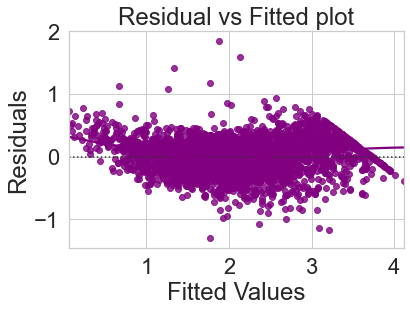

In [284]:
sns.set_style("whitegrid")
sns.residplot(fitted, residual, color="purple", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual vs Fitted plot")
plt.show()

- There is not patterns or tendency detectes in the plot above, there's no linear relation with the dependent variable.

##### TEST For NORMALITY

- Checking bu QQ Plot, residuals should be follow a normal distribution .
- Perform Shapiro-Wilk Test

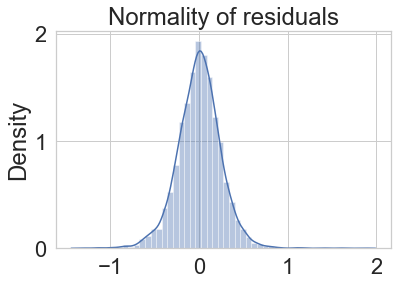

In [285]:
sns.distplot(residual)
plt.title("Normality of residuals")
plt.show()

- The QQ plot of residuals can be used to visually check the normality assumption. The normal probability plot of residuals should approximately follow a straight line.

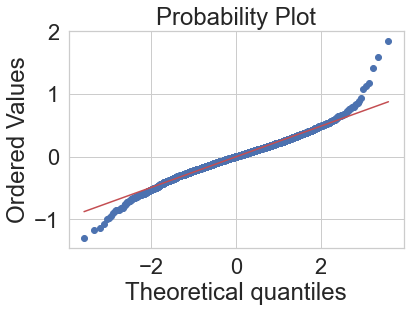

In [286]:
import pylab
import scipy.stats as stats

stats.probplot(residual, dist="norm", plot=pylab)
plt.show()

In [287]:
stats.shapiro(residual)

ShapiroResult(statistic=0.9813792109489441, pvalue=4.032566386257893e-23)

- The residuals are not normal as per shapiro test, but as per QQ plot they are approximately normal.
- The issue with shapiro test is when dataset is big, even for small deviations, it shows data as not normal.
- Hence we go with the QQ plot and say that residuals are normal.

#### TEST FOR HOMOSCEDASTICITY

- Test - goldfeldquandt test

- Homoscedacity: If the variance of the residuals are symmetrically distributed across the regression line, then the data is said to homoscedastic.

- Heteroscedacity: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.

For goldfeldquandt test, the null and alternate hypotheses are as follows:

- Null hypothesis : Residuals are homoscedastic
- Alternate hypothesis : Residuals have heteroscedasticity

In [288]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residual, X_train2)
lzip(name, test)

[('F statistic', 1.0052589496844744), ('p-value', 0.4523541264299431)]

Since p-value > 0.05, we can say that the residuals are homoscedastic. This assumption is therefore valid in the data, the residuals are symmetrically distributed accross the regression line.

### Predicting on the test data

In [289]:
X_train2.columns

Index(['const', 'Year', 'Mileage', 'Power', 'Kilometers_Driven_log',
       'Engine_log', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Transmission_Manual',
       'Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third'],
      dtype='object')

In [290]:
# Selecting columns from test data that we used to create our final model
X_test_final = X_test[X_train2.columns]

In [291]:
X_test_final.head()

,const,Year,Mileage,Power,Kilometers_Driven_log,Engine_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
S.No.,,,,,,,,,,,,,,,,,,,,,,,
2868,1.000,2013.000,23.400,74.000,11.142,7.130,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
5924,1.000,2017.000,15.400,120.000,10.194,7.600,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
3764,1.000,2014.000,15.100,140.000,11.362,7.687,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
4144,1.000,2016.000,25.000,69.010,10.859,7.242,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0
2780,1.000,2009.000,17.000,0.000,11.513,6.991,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [292]:
# Checking model performance on train set (seen 70% data)
print("Train Performance\n")
model_perf(olsres1, X_train2.values, y_train)

Train Performance



,MAE,MAPE,RMSE,R^2
0,0.186,10.617,0.246,0.883


In [293]:
# Checking model performance on test set (seen 70% data)
print("Test Performance\n")
model_perf(olsres1, X_test_final.values, y_test)

Test Performance



,MAE,MAPE,RMSE,R^2
0,0.194,11.275,0.261,0.875


- Now we can see that the model has low test and train RMSE and MAE, and both the errors are comparable. So, our model is not suffering from overfitting.

- The model is able to explain 87% of the variation on the test set, which is very good.

- The MAPE on the test set suggests we can predict within 11.28% of the price.

- The model olsres1 is good prediction for the Price in the market

In [294]:
# let us print the model summary

olsmod1 = sm.OLS(y_train, X_train2)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1444.
Date:                Sun, 03 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:26:56   Log-Likelihood:                -76.285
No. Observations:                4213   AIC:                             198.6
Df Residuals:                    4190   BIC:                             344.5
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

# <a id = 'link7'>Conclusions</a>

- The Model olsres1 is the final model which follow all the assumprions and can be used for interpretation.

- Milage, Power, Kilometers driven and Engine_log are very significant, as it was expected.

- Some locations are negative significant to decrease te value price of an used car.

- Owner Type also has a negative effect on the price for used car.

- A diesel cars not only are the most popular, tend to be a positive impact for value price of the car.

- Manual transmission is the number one choice in the market price but also has a negative impact on the value of the car, as it has been seen in the plot, automatic cars are more expensive. 

- The year of the car has a positive impact into the used car price, as it should be expected newer cars, even though they are used, tends to be more pricy than older versions. 
